<a href="https://colab.research.google.com/github/maianhtran2005/MachineLearning/blob/main/Demo_Alzheimers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#C1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

sns.set_theme(context='notebook', palette='muted', style='darkgrid')

##Hiểu & làm sạch dữ liệu

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/ML/Demo/alzheimers_disease_data.csv")

# View first few rows
df.head()


Mounted at /content/drive


PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0           13.297218          6.327112     1.347214      9.025679   
1            4.542524          7.619885     0.518767      7.151293   
2           19.555085          7.844988     1.826335      9.673574   
3           12.209266          8.428001     7.435604      8.392554   
4           18.454356          6.310461     0.795498      5.597238   

   FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
0                        0                      0         1           1   
1                        0                      0         0           0   
2                        1                      0         0           0   
3                        0                      0         0           0   
4                        0                      0         0           0   

   HeadInjury  Hypertension  SystolicBP  DiastolicBP  CholesterolTotal  \
0           0             0         142           72        242.366840   
1           0             0         115           64        231.162595   
2           0             0          99          116        284.181858   
3           0             0         118          115        159.582240   
4           0             0          94          117        237.602184   

   CholesterolLDL  CholesterolHDL  CholesterolTriglycerides       MMSE  \
0       56.150897       33.682563                162.189143  21.463532   
1      193.407996       79.028477                294.630909  20.613267   
2      153.322762       69.772292                 83.638324   7.356249   
3       65.366637       68.457491                277.577358  13.991127   
4       92.869700       56.874305                291.198780  13.517609   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              6.518877                 0                   0  1.725883   
1              7.118696                 0                   0  2.592424   
2              5.895077                 0                   0  7.119548   
3              8.965106                 0                   1  6.481226   
4              6.045039                 0                   0  0.014691   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0          0               0                   0                          1   
1          0               0                   0                          0   
2          0               1                   0                          1   
3          0               0                   0                          0   
4          0               0                   1                          1   

   Forgetfulness  Diagnosis DoctorInCharge  
0              0          0      XXXConfid  
1              1          0      XXXConfid  
2              0          0      XXXConfid  
3              0          0      XXXConfid  
4              0          0      XXXConfid

In [ ]:
# Summary of columns, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
# Count duplicates
df.duplicated().sum()


np.int64(0)

In [ ]:
numerical_columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
# Function to calculate number of outliers using IQR
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Calculate and print the number of outliers for each numerical column
print("Number of outliers per numerical column (IQR method):")
for col in numerical_columns:
    num_outliers = count_outliers_iqr(df, col)
    print(f"{col}: {num_outliers}")

Number of outliers per numerical column (IQR method):
Age: 0
BMI: 0
AlcoholConsumption: 0
PhysicalActivity: 0
DietQuality: 0
SleepQuality: 0
SystolicBP: 0
DiastolicBP: 0
CholesterolTotal: 0
CholesterolLDL: 0
CholesterolHDL: 0
CholesterolTriglycerides: 0
MMSE: 0
FunctionalAssessment: 0
ADL: 0


- Không thiếu, không lặp.
- Tất cả đều là dữ liệu số.
- Không có outlier.


In [ ]:
# Basic stats for numeric columns
df.describe()

PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173            5.757910          2.857191   
min      15.008851     0.000000            0.002003          0.003616   
25%      21.611408     0.000000            5.139810          2.570626   
50%      27.823924     0.000000            9.934412          4.766424   
75%      33.869778     1.000000           15.157931          7.427899   
max      39.992767     1.000000           19.989293          9.987429   

       DietQuality  SleepQuality  FamilyHistoryAlzheimers  \
count  2149.000000   2149.000000              2149.000000   
mean      4.993138      7.051081                 0.252210   
std       2.909055      1.763573                 0.434382   
min       0.009385      4.002629                 0.000000   
25%       2.458455      5.482997                 0.000000   
50%       5.076087      7.115646                 0.000000   
75%       7.558625      8.562521                 1.000000   
max       9.998346      9.999840                 1.000000   

       CardiovascularDisease     Diabetes   Depression   HeadInjury  \
count            2149.000000  2149.000000  2149.000000  2149.000000   
mean                0.144253     0.150768     0.200558     0.092601   
std                 0.351428     0.357906     0.400511     0.289940   
min                 0.000000     0.000000     0.000000     0.000000   
25%                 0.000000     0.000000     0.000000     0.000000   
50%                 0.000000     0.000000     0.000000     0.000000   
75%                 0.000000     0.000000     0.000000     0.000000   
max                 1.000000     1.000000     1.000000     1.000000   

       Hypertension   SystolicBP  DiastolicBP  CholesterolTotal  \
count   2149.000000  2149.000000  2149.000000       2149.000000   
mean       0.148906   134.264774    89.847836        225.197519   
std        0.356079    25.949352    17.592496         42.542233   
min        0.000000    90.000000    60.000000        150.093316   
25%        0.000000   112.000000    74.000000        190.252963   
50%        0.000000   134.000000    91.000000        225.086430   
75%        0.000000   157.000000   105.000000        262.031657   
max        1.000000   179.000000   119.000000        299.993352   

       CholesterolLDL  CholesterolHDL  CholesterolTriglycerides         MMSE  \
count     2149.000000     2149.000000               2149.000000  2149.000000   
mean       124.335944       59.463533                228.281496    14.755132   
std         43.366584       23.139174                101.986721     8.613151   
min         50.230707       20.003434                 50.407194     0.005312   
25%         87.195798       39.095698                137.583222     7.167602   
50%        123.342593       59.768237                230.301983    14.441660   
75%        161.733733       78.939050                314.839046    22.161028   
max        199.965665       99.980324                399.941862    29.991381   

       FunctionalAssessment  MemoryComplaints  BehavioralProblems  \
count           2149.000000       2149.000000         2149.000000   
mean

In [ ]:
# Count occurrences of each unique value in the 'DoctorInCharge'
df.DoctorInCharge.value_counts()

DoctorInCharge
XXXConfid    2149
Name: count, dtype: int64

In [ ]:
# Drop unnecessary columns from the DataFrame
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)
#axis=1: This argument specifies that we want to drop columns
 #(axis=0 would drop rows).
#inplace=True: This argument modifies the DataFrame df directly without needing
#to assign the result back to df.

####Thông tin về bộ dữ liệu

>**Patient Information**

**Patient ID**

- PatientID: A unique identifier assigned to each patient (4751 to 6900).

**Demographic Details**

Age: The age of the patients ranges from 60 to 90 years.

Gender: Gender of the patients, where 0 represents Male and 1 represents Female.

Ethnicity: The ethnicity of the patients, coded as follows:
- 0: Caucasian

- 1: African American

- 2: Asian

- 3: Other

EducationLevel: The education level of the patients, coded as follows:

- 0: None

- 1: High School

- 2: Bachelor's

- 3: Higher

**Lifestyle Factors**

BMI: Body Mass Index of the patients, ranging from 15 to 40.

Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.

AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.

PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.

DietQuality: Diet quality score, ranging from 0 to 10.

SleepQuality: Sleep quality score, ranging from 4 to 10.

>**Medical History**

FamilyHistoryAlzheimers: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

CardiovascularDisease: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.

Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.

Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.

HeadInjury: History of head injury, where 0 indicates No and 1 indicates Yes.

Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.

>**Clinical Measurements**

SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.

DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.

CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.

CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.

CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.

CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.

>**Cognitive and Functional Assessments**

MMSE: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.

FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.

MemoryComplaints: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.

BehavioralProblems: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.

ADL: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.

>**Symptoms**

Confusion: Presence of confusion, where 0 indicates No and 1 indicates Yes.

Disorientation: Presence of disorientation, where 0 indicates No and 1 indicates Yes.

PersonalityChanges: Presence of personality changes, where 0 indicates No and 1 indicates Yes.

DifficultyCompletingTasks: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.

Forgetfulness: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.

>**Diagnosis Information**

Diagnosis: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

>**Confidential Information**

DoctorInCharge: This column contains confidential information about the doctor in charge, with "XXXConfid" as the value for all patients.

##Trực quan hóa phân bố dữ liệu

In [ ]:
unique_counts = df.nunique()
print(unique_counts)

Age                            31
Gender                          2
Ethnicity                       4
EducationLevel                  4
BMI                          2149
Smoking                         2
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
FamilyHistoryAlzheimers         2
CardiovascularDisease           2
Diabetes                        2
Depression                      2
HeadInjury                      2
Hypertension                    2
SystolicBP                     90
DiastolicBP                    60
CholesterolTotal             2149
CholesterolLDL               2149
CholesterolHDL               2149
CholesterolTriglycerides     2149
MMSE                         2149
FunctionalAssessment         2149
MemoryComplaints                2
BehavioralProblems              2
ADL                          2149
Confusion                       2
Disorientation                  2
PersonalityCha

In [ ]:
# Identify numerical columns: columns with more than 10 unique values are considered numerical
numerical_columns = [col for col in df.columns if unique_counts[col] > 10]

# Identify categorical columns: columns that are not numerical and not 'Diagnosis'
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

In [ ]:
print(numerical_columns)
print(categorical_columns)

['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
['BehavioralProblems', 'CardiovascularDisease', 'Confusion', 'Depression', 'Diabetes', 'DifficultyCompletingTasks', 'Disorientation', 'EducationLevel', 'Ethnicity', 'FamilyHistoryAlzheimers', 'Forgetfulness', 'Gender', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'PersonalityChanges', 'Smoking']


###Biến mục tiêu

Text(0.5, 1.0, 'Countplot of Diagnosis')

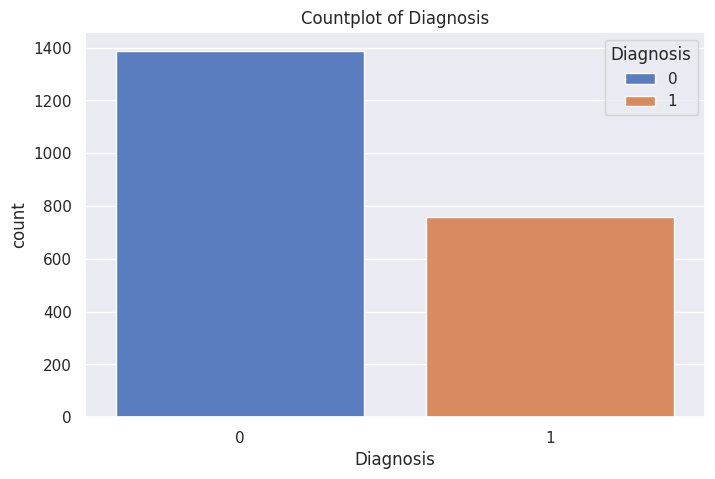

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Diagnosis', hue='Diagnosis')
# Add hue=column here to color the bars based on the different categories
plt.title(f'Countplot of Diagnosis')

####Nhận xét:

Số quan sát lớp 0 gần gấp đôi số quan sát lớp 1.

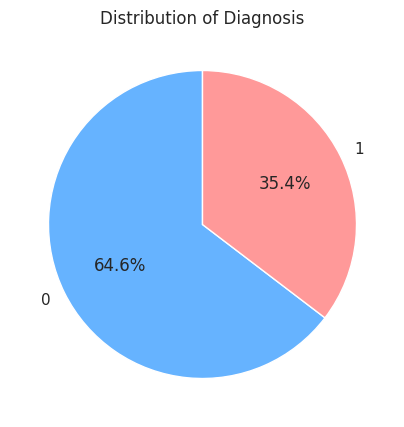

In [ ]:
import matplotlib.pyplot as plt

# Count values
target_counts = df['Diagnosis'].value_counts()

# Plot pie chart
plt.figure(figsize=(5,5))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Diagnosis')
plt.show()

###Biến phân loại

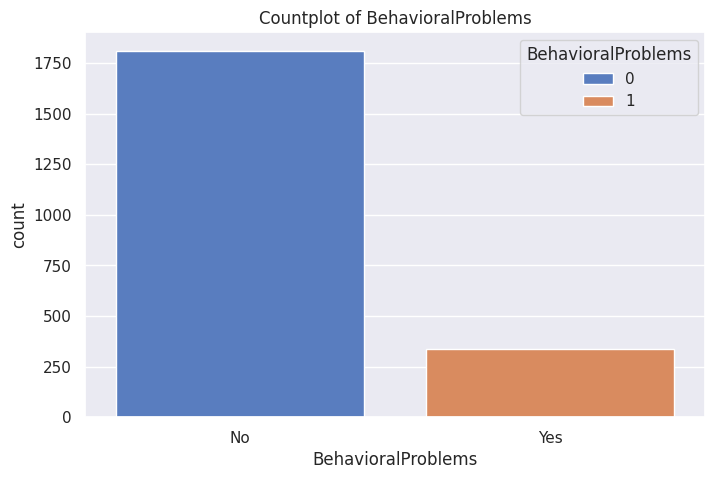

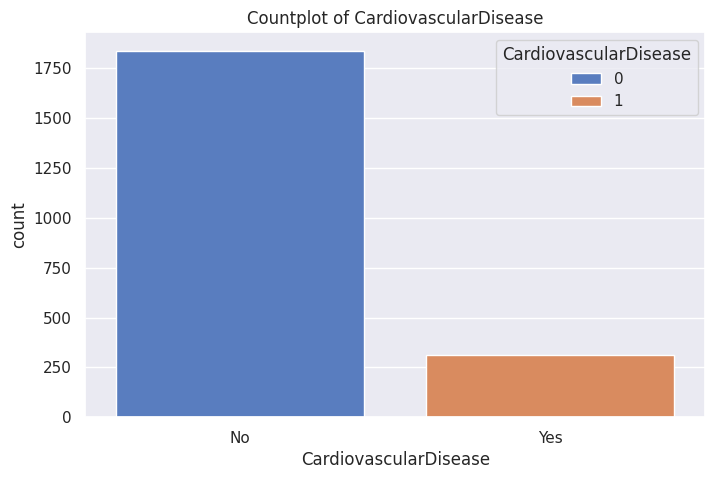

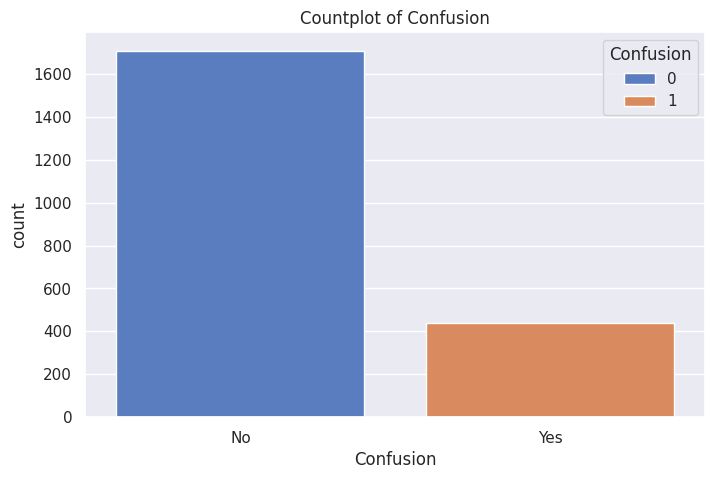

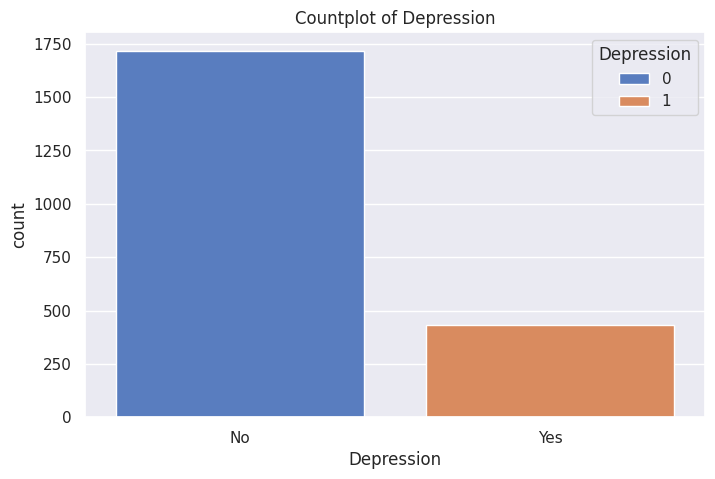

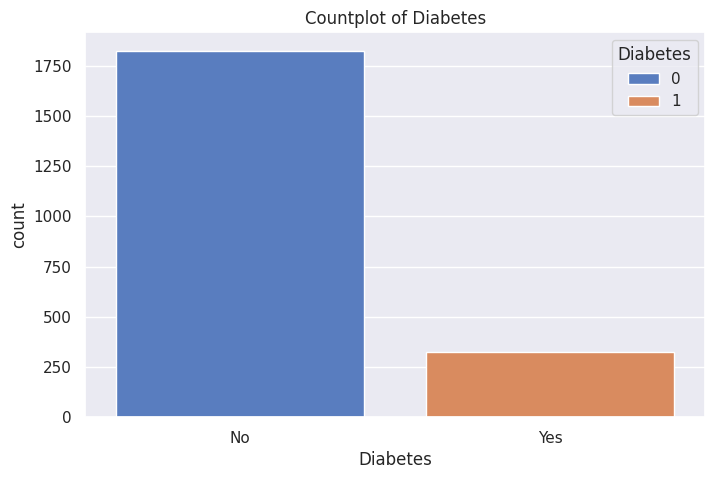

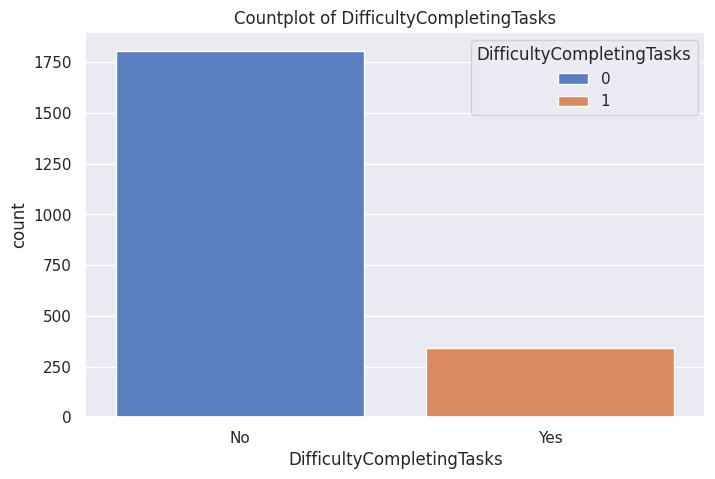

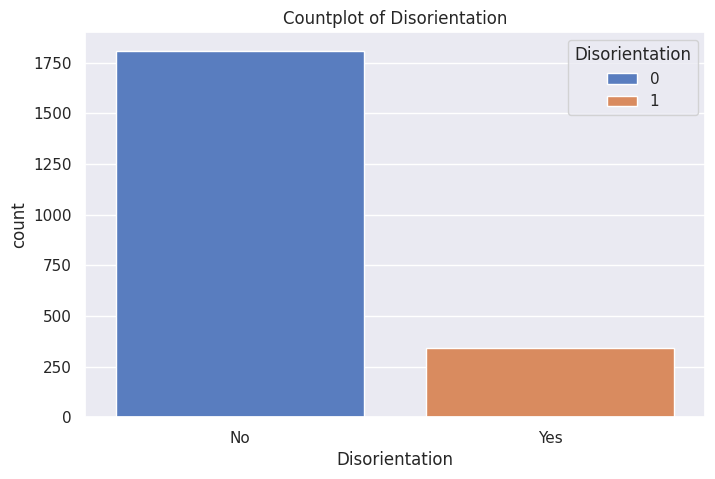

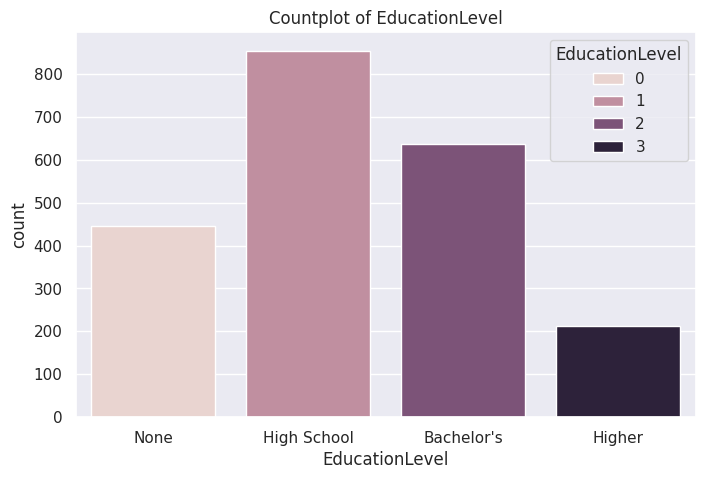

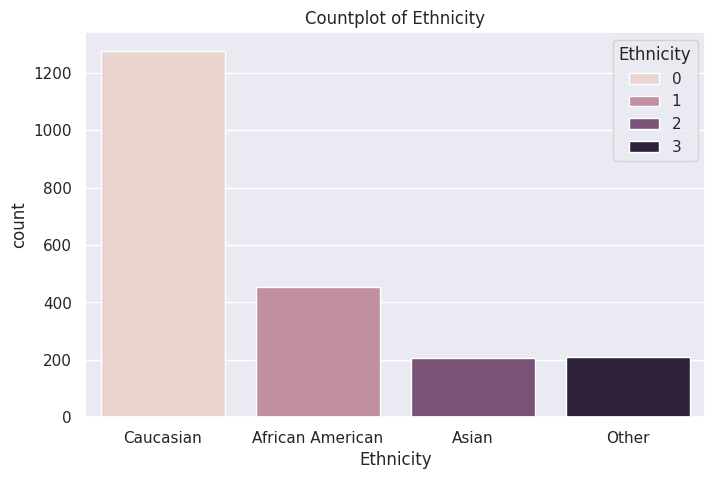

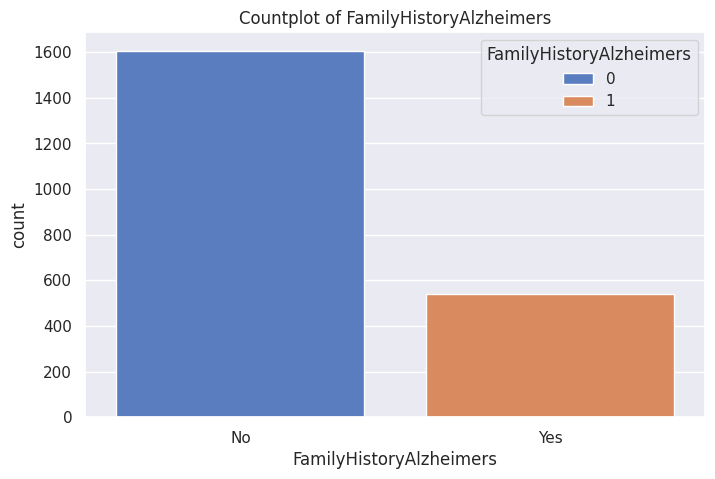

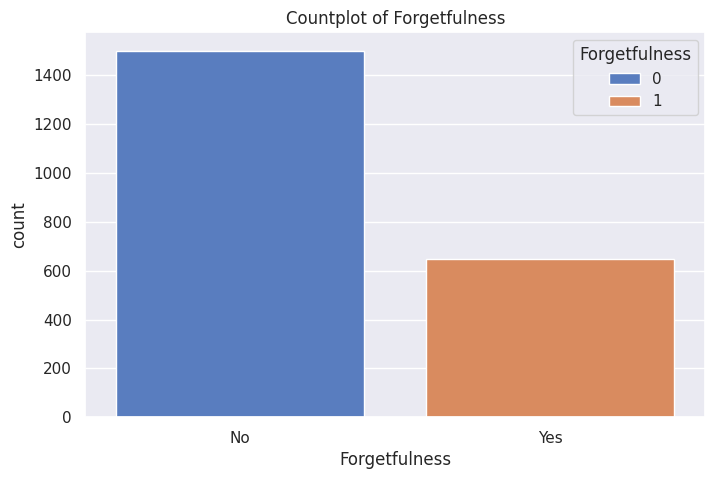

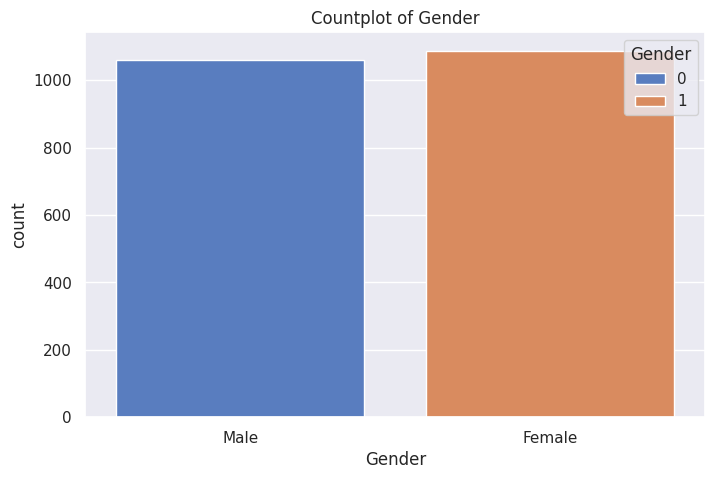

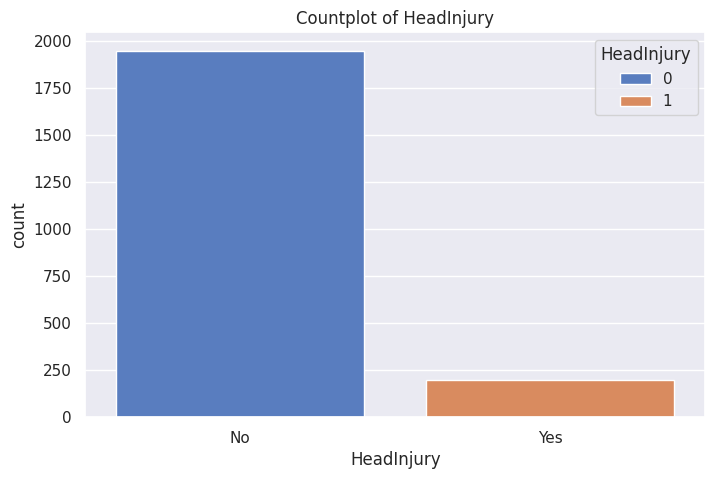

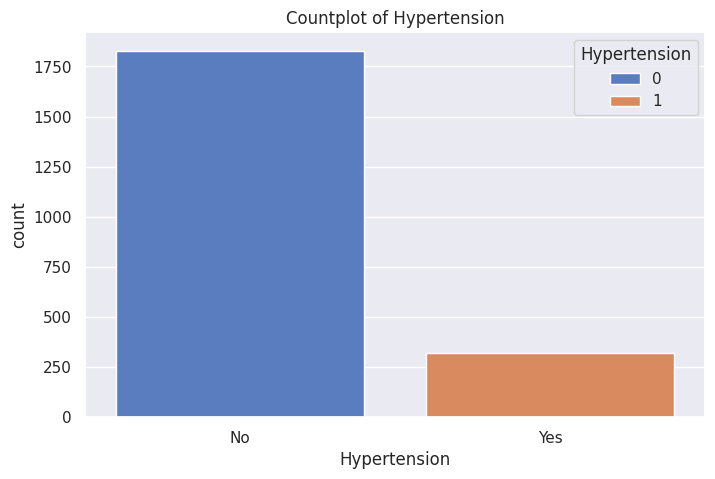

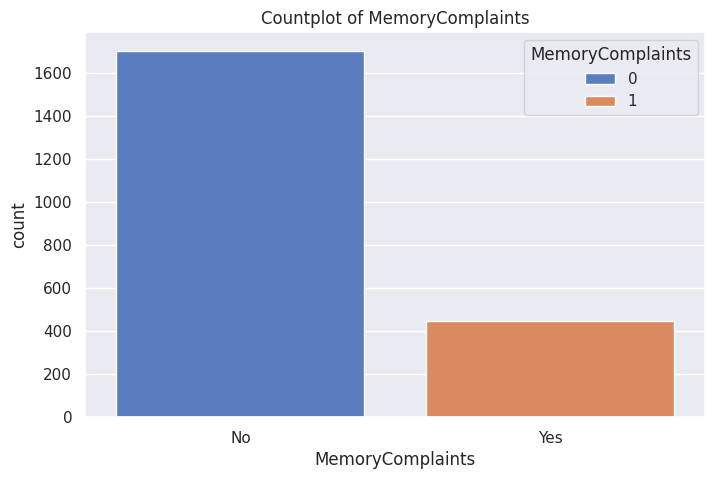

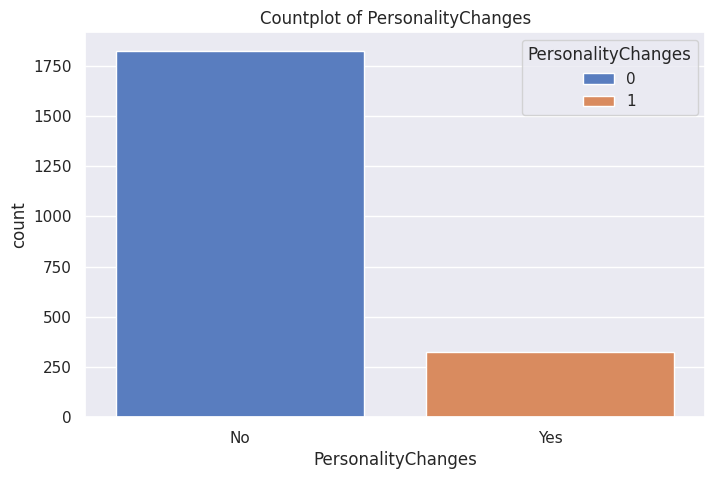

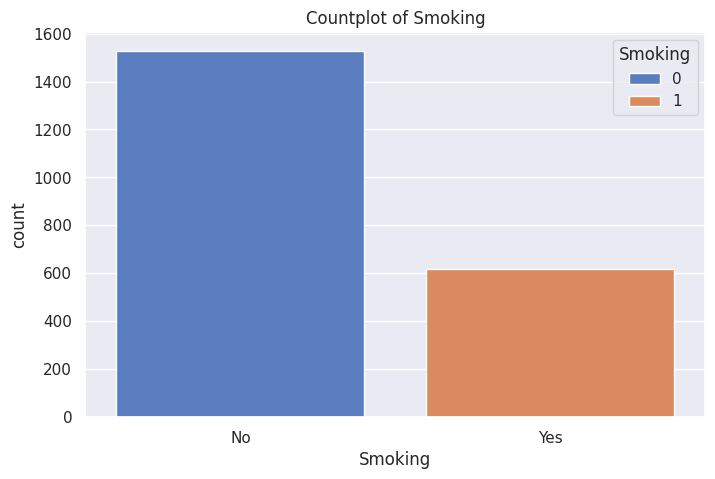

In [ ]:
# Custom labels for the categorical columns
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

# Plot countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, hue=column)
    # Add hue=column here to color the bars based on the different categories
    plt.title(f'Countplot of {column}')

    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)

    plt.show()

####Observation:
- Các vấn đề sức khỏe/ lịch sử bệnh gia đình: "Không" chiếm phần lớn;
- Dân tộc: Caucasian chiếm tỉ lệ lớn nhất;
- Học vấn: high school nhiều nhất, tiếp đến là bachelor;
- Giới tính: rất cân bằng giữa Nam-Nữ.

###Biến liên tục

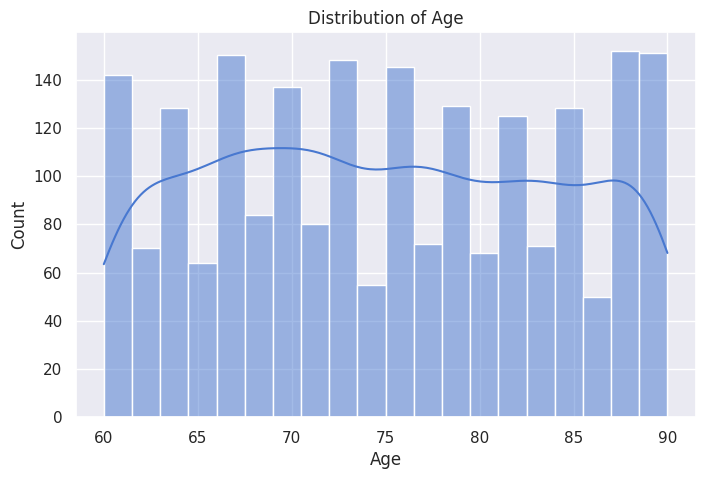

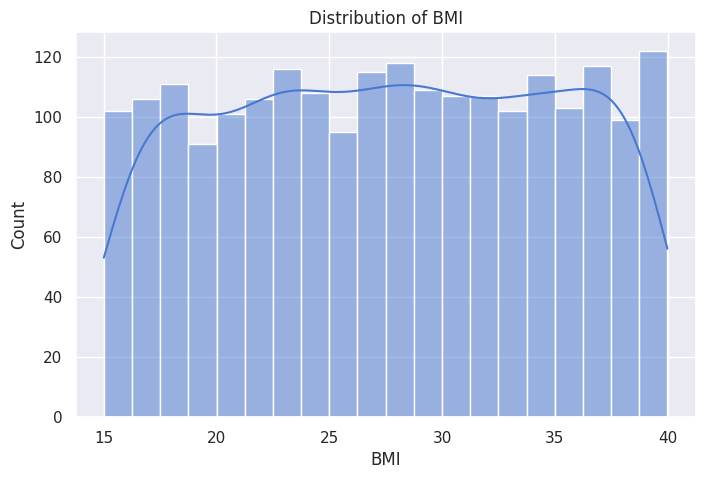

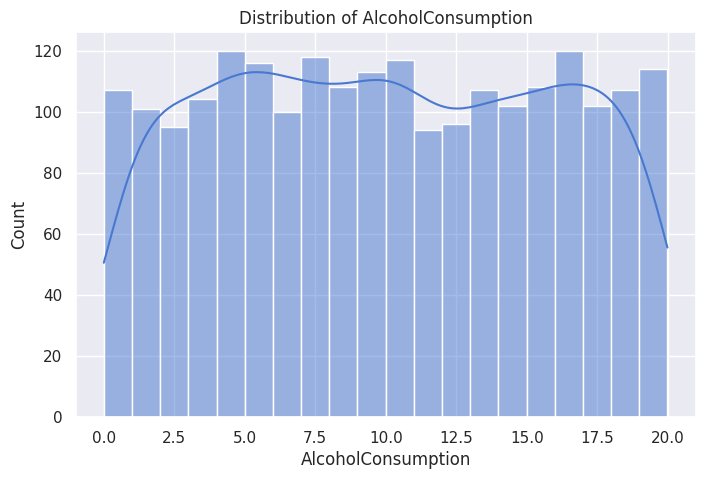

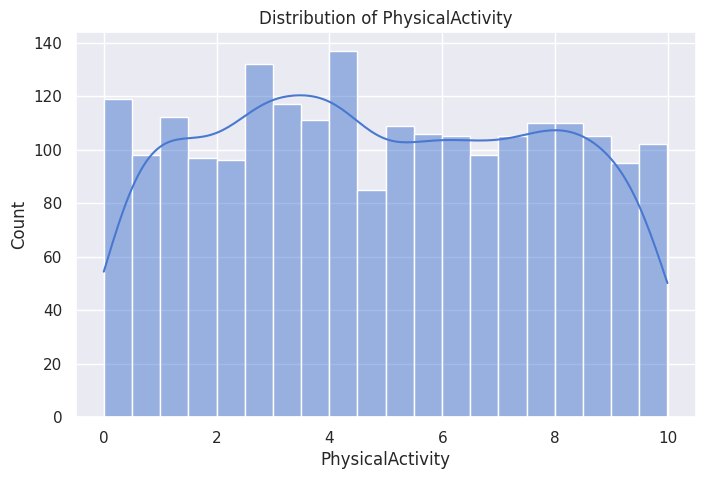

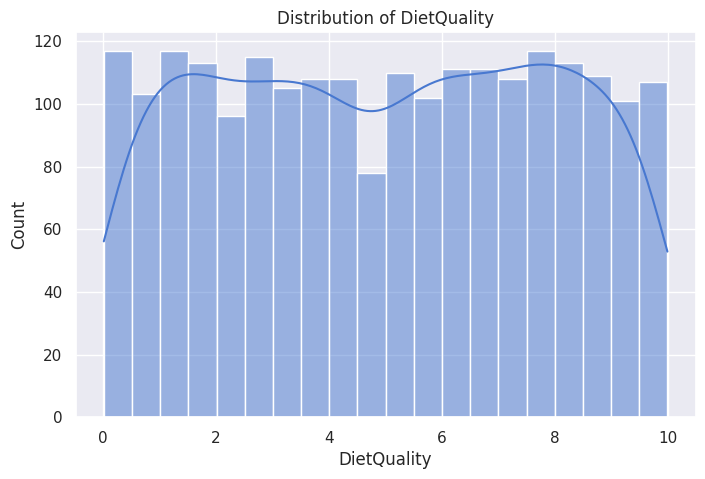

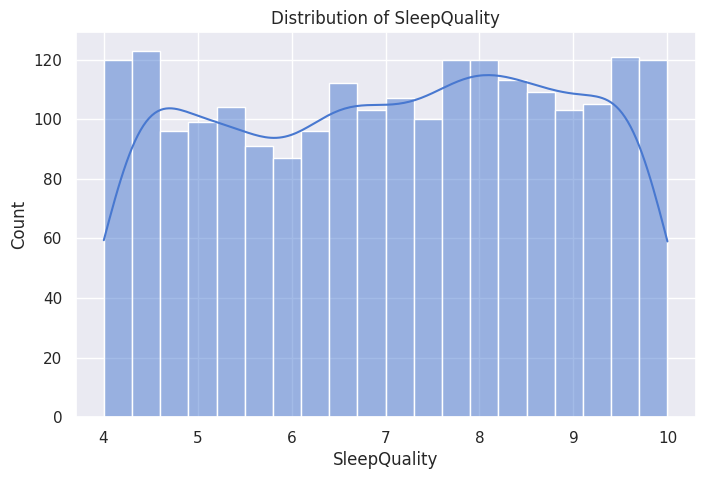

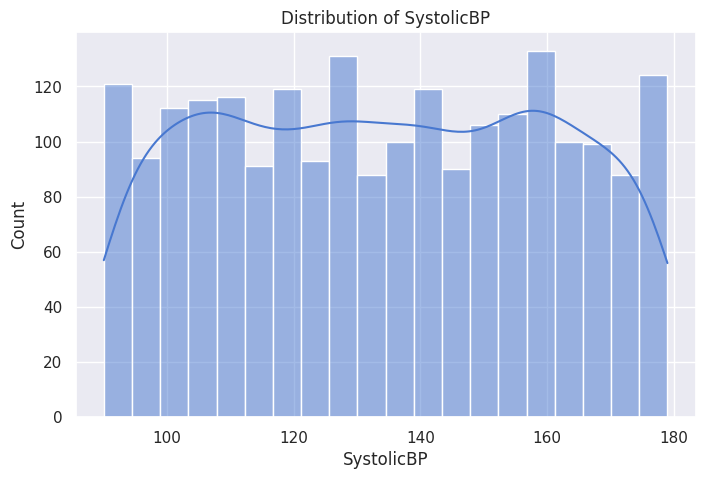

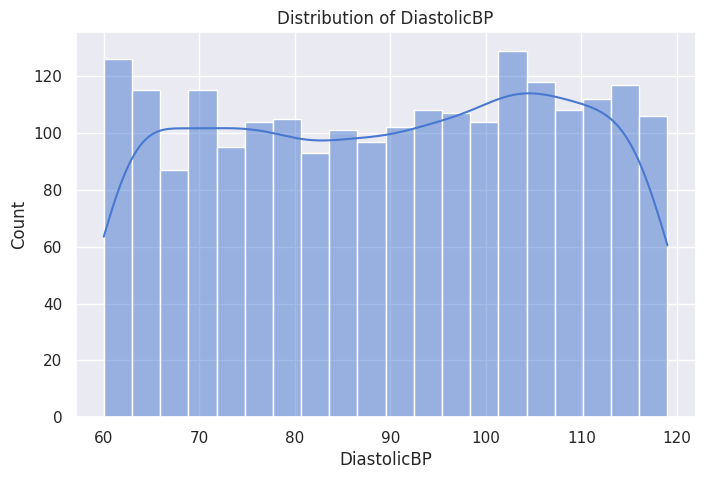

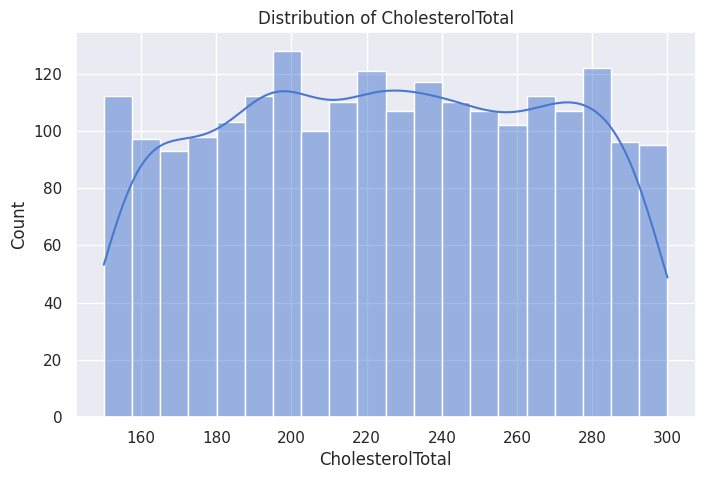

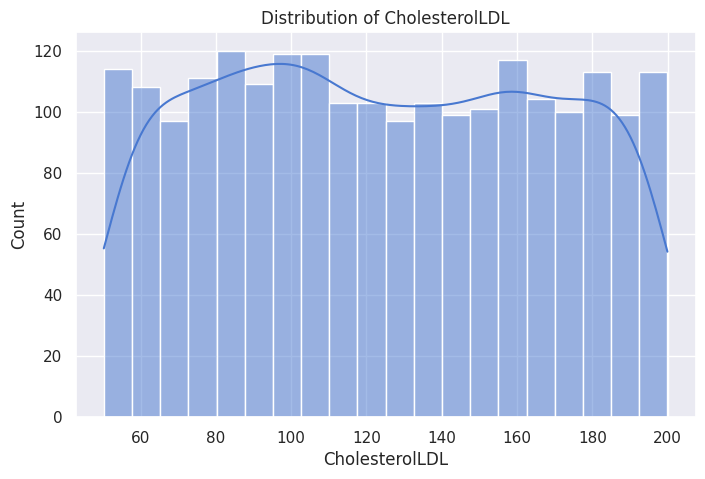

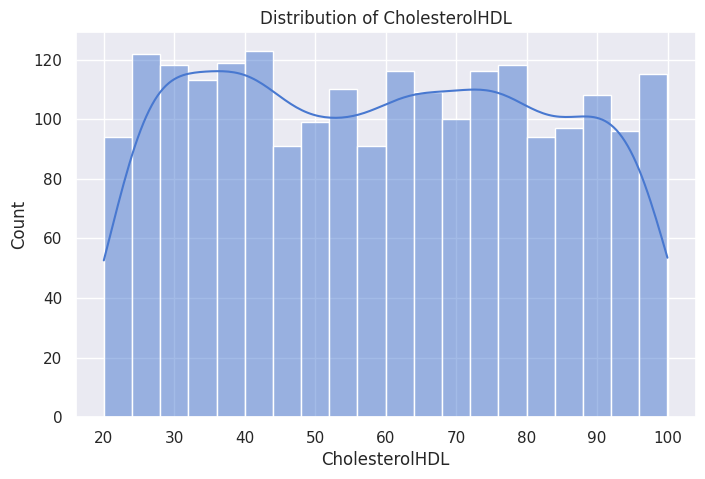

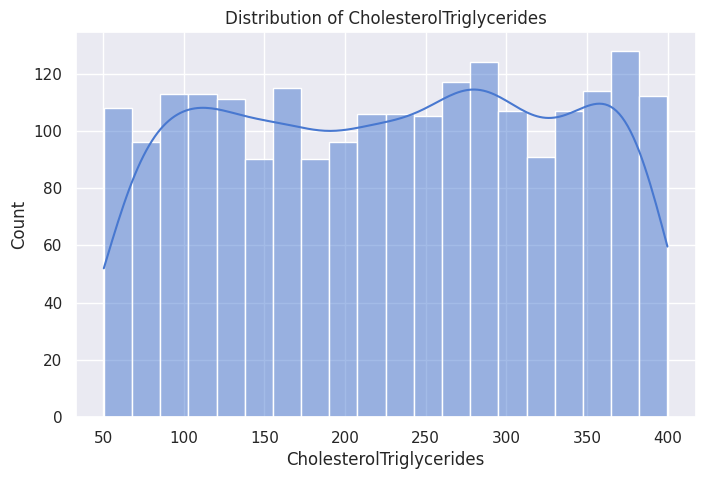

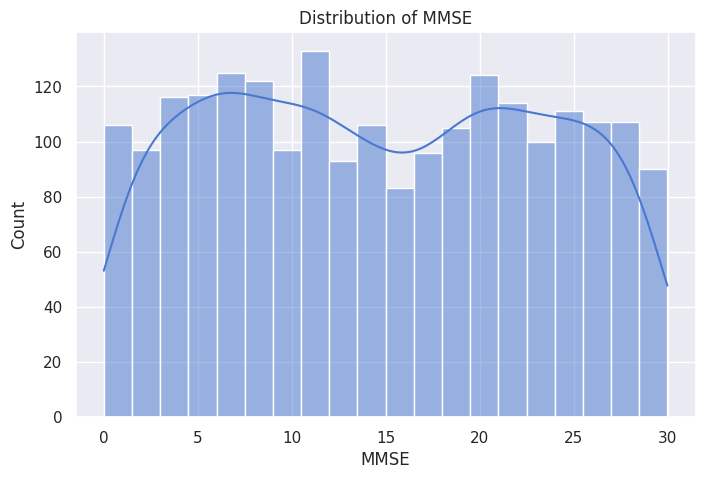

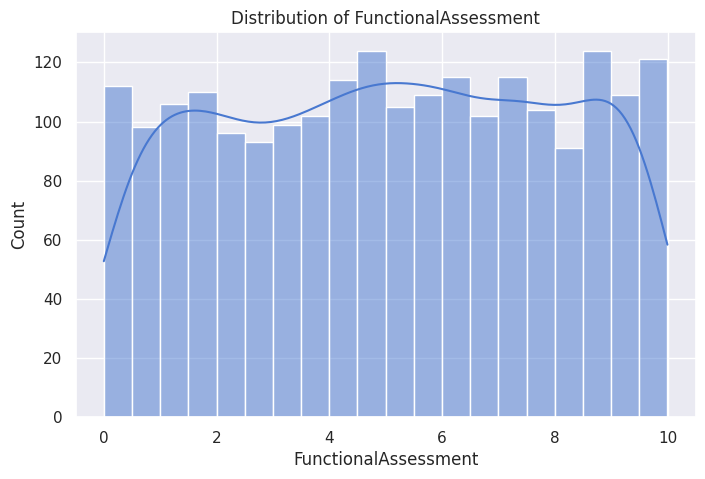

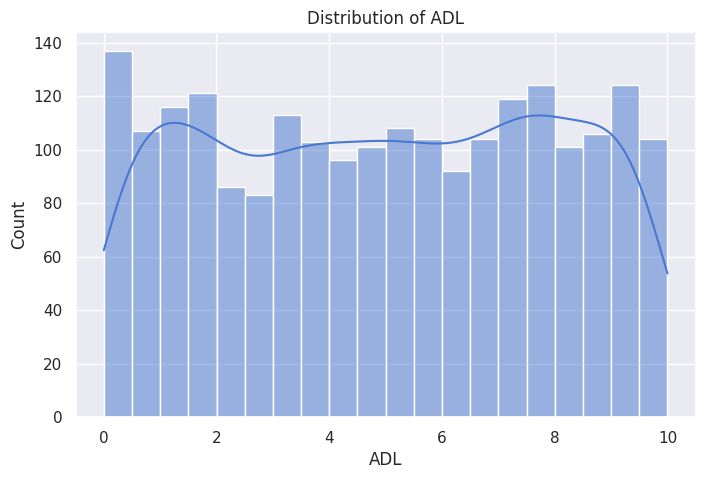

In [ ]:
# Plot histogram for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    #kde for Kernel Density Estimate line
    #bins=20 means the data will be divided into 20 intervals.
    plt.title(f'Distribution of {column}')
    plt.show()

####Nhận xét:
- Đa phần phân bố ~ đều;
- MMSE có 2 đỉnh khá rõ;

####Boxplot

A summary of the data’s center, spread, skewness, and outliers.

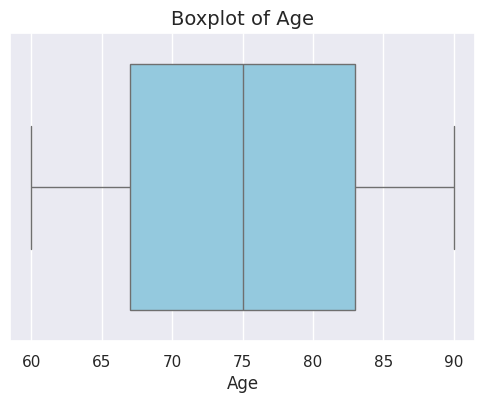

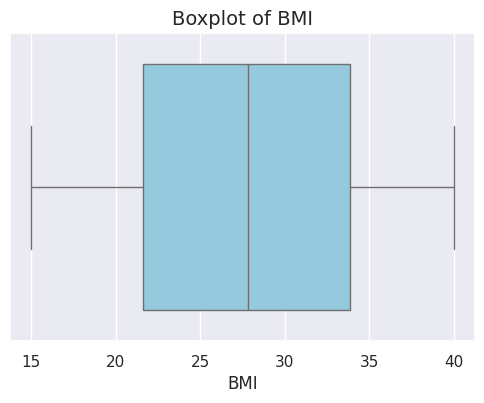

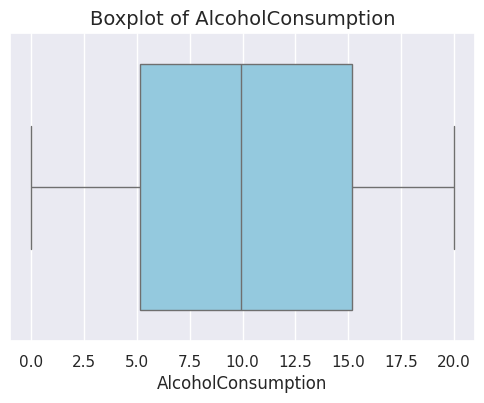

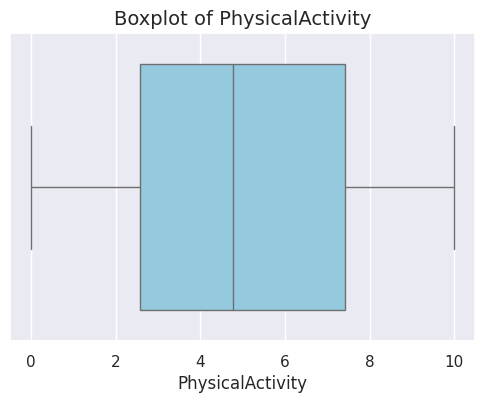

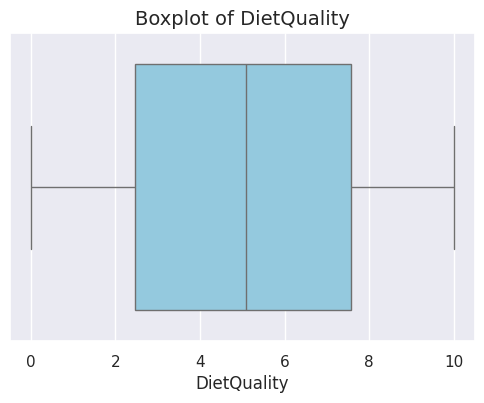

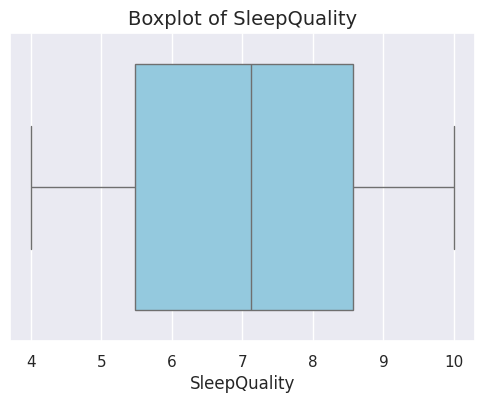

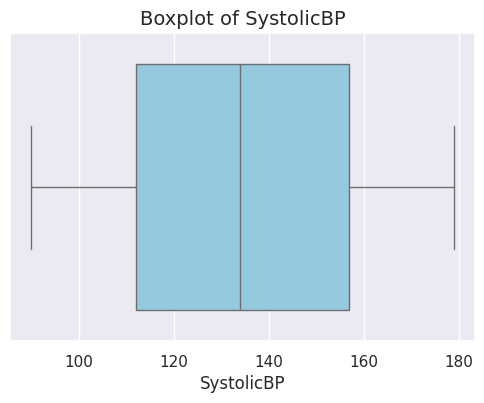

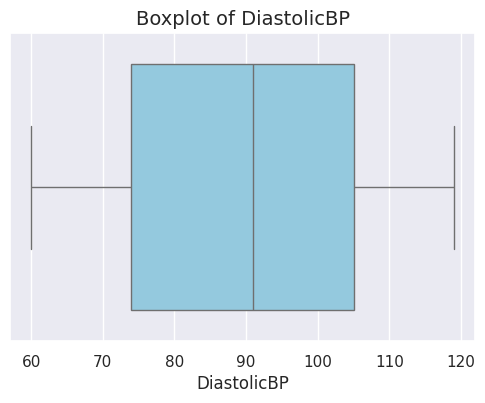

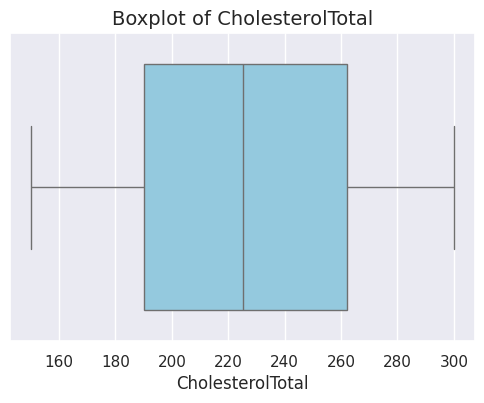

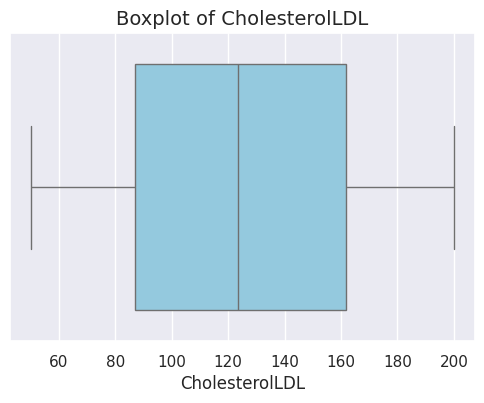

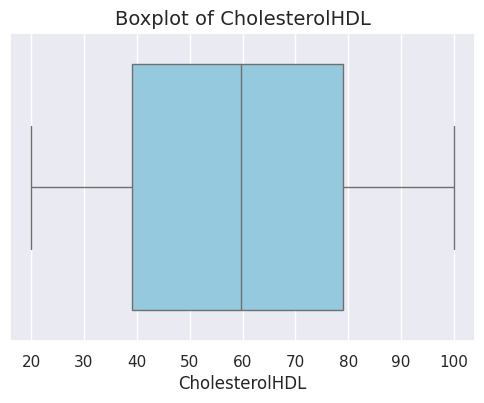

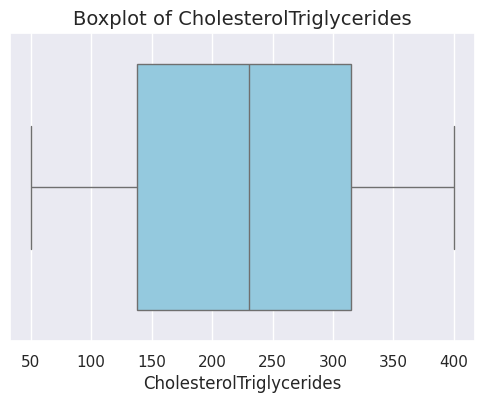

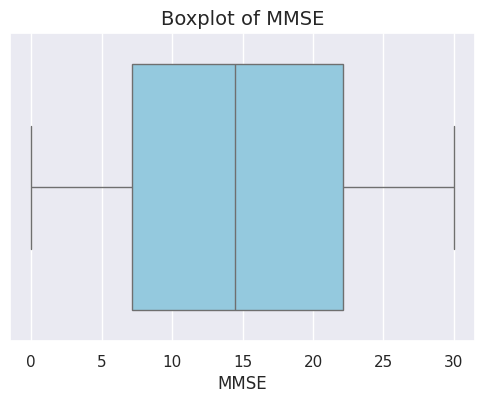

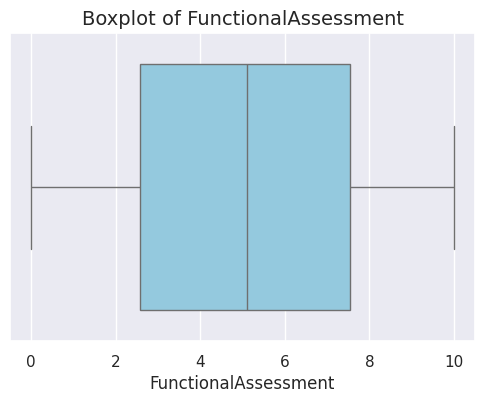

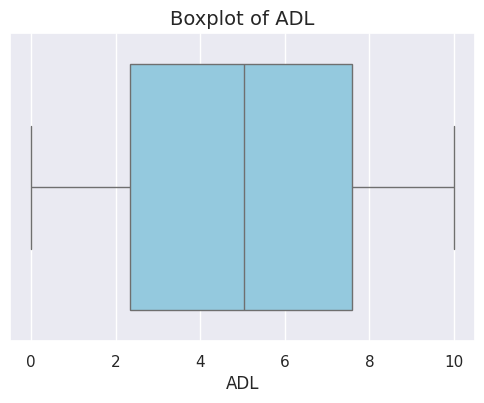

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.xlabel(col)
    plt.show()


Đa phần các biến:
- Phân bố khá đều;
- Ko thấy có giá trị ngoại lai.

##Plot biến mục tiêu với các biến đặc trưng

###Biến liên tục

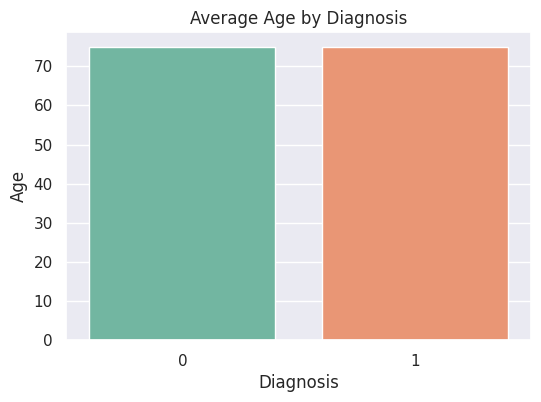

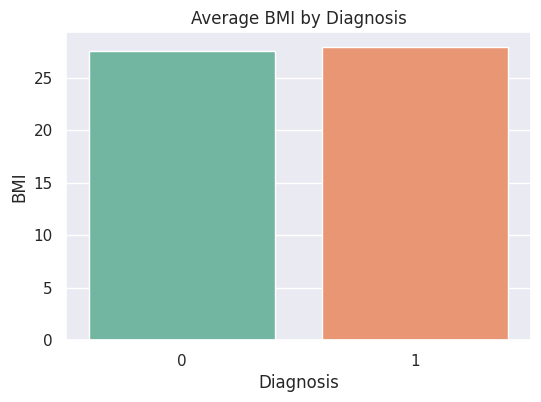

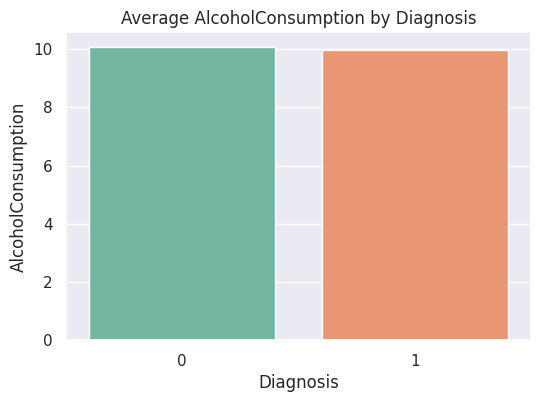

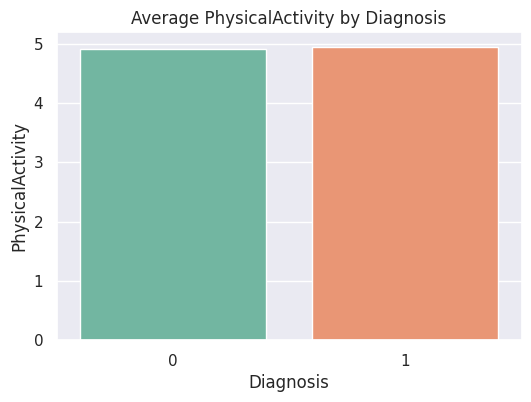

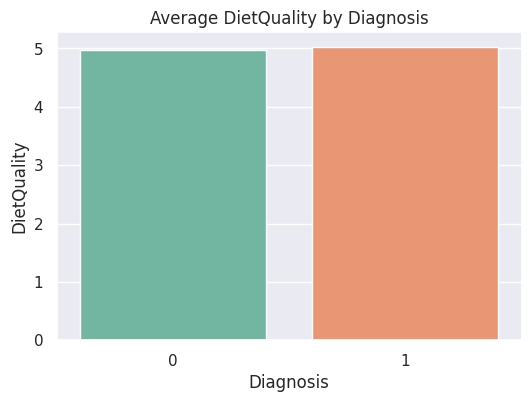

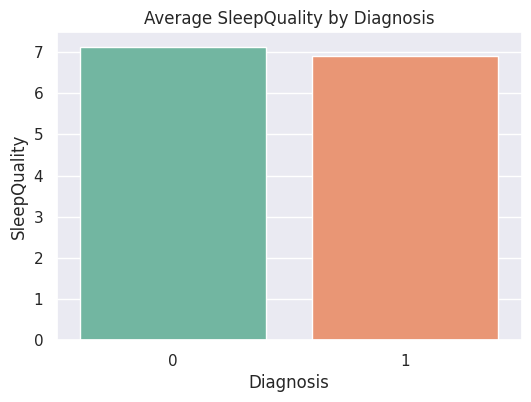

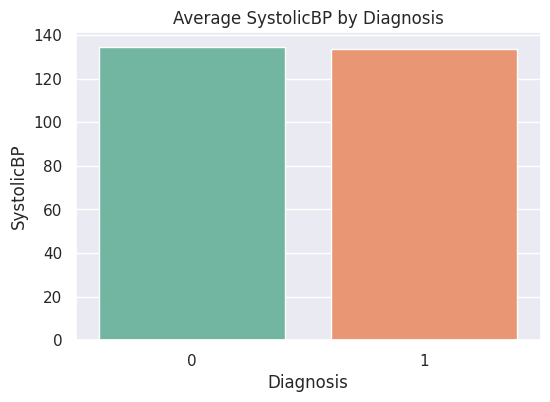

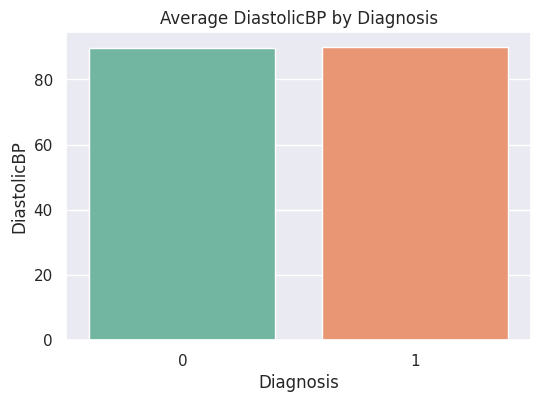

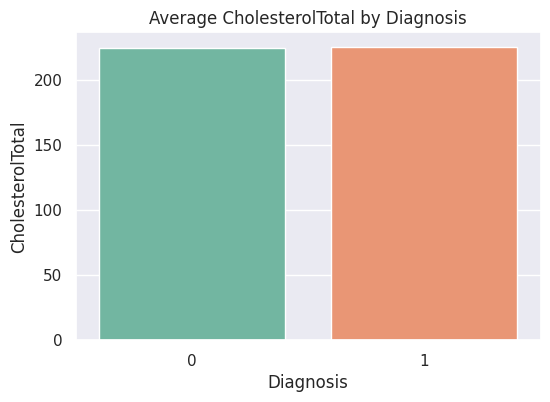

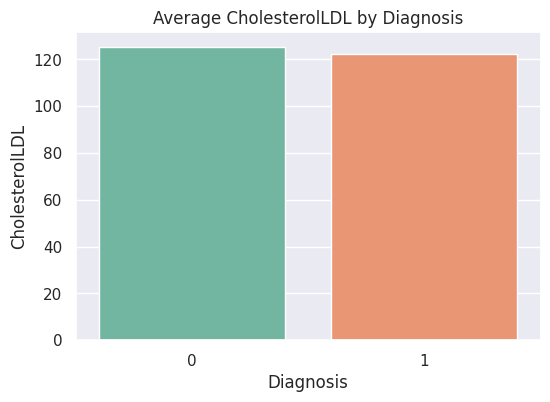

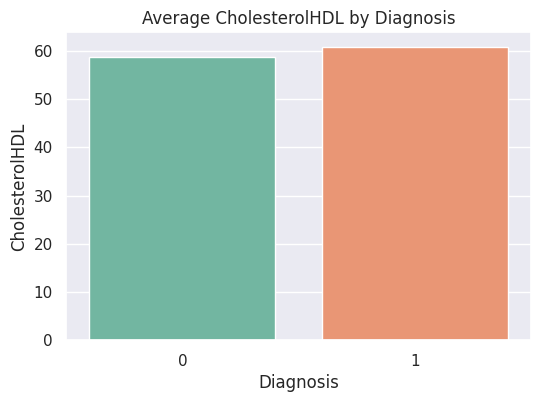

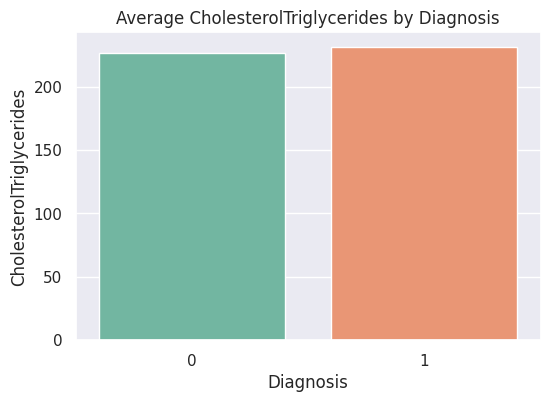

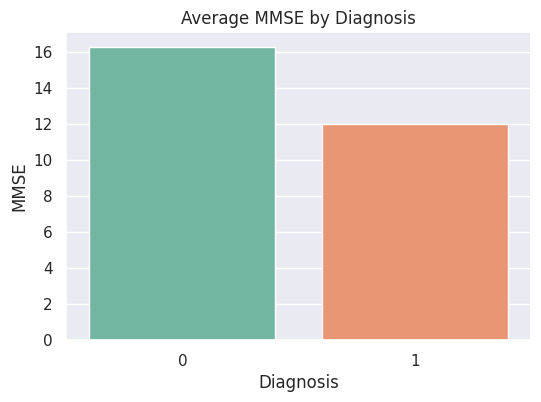

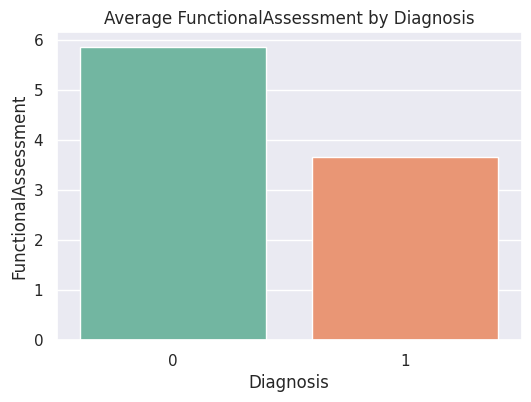

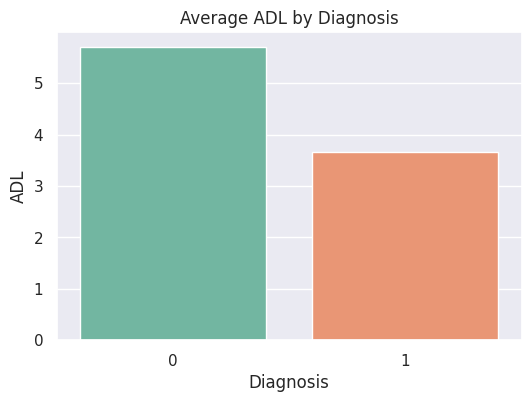

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Diagnosis', y=col, data=df, estimator='mean', ci=None, palette='Set2')
    plt.title(f"Average {col} by Diagnosis")
    plt.show()

####Nhận xét:
- Với đa phần các biến: giá trị trung bình tương đương nhau cho 2 lớp của biến mục tiêu;
- Với MMSE, FunctionalAssessment, ADL: giá trị trung bình có vẻ thấp hơn cho lớp 1.

In [ ]:
import plotly.express as px

#Distribution of Activities of Daily Living score
fig = px.scatter(df, color='Diagnosis', y='ADL')
fig.show()

Tỉ lệ mắc bệnh trong những người có ADL lớn hơn 5 có vẻ ít hơn.

In [ ]:
fig = px.scatter(df, color='Diagnosis', y='MMSE')
fig.show()

Ít thấy bệnh nhân có MMSE >= 25 trong bộ dữ liệu.

In [ ]:
fig = px.scatter(df, color='Diagnosis', y='FunctionalAssessment')
fig.show()

Những người ko mắc bệnh thường có FunctionalAssessment cao hơn.

####Cách khác:

dùng Boxplot để tóm tắt nhiều thông tin hơn (trung bình, khoảng phân bổ, ...)

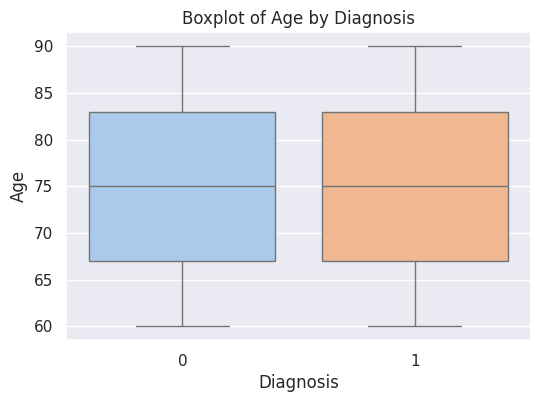

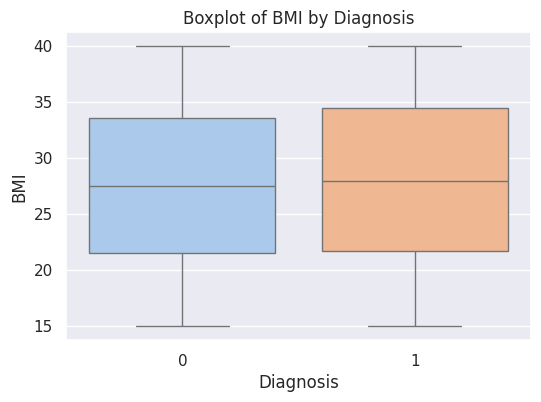

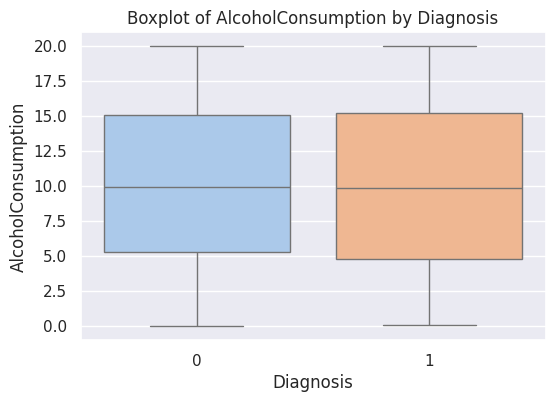

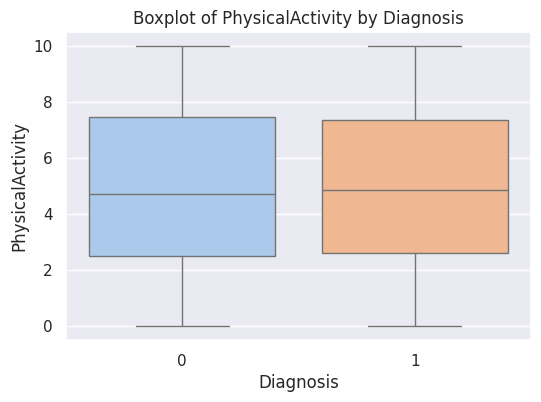

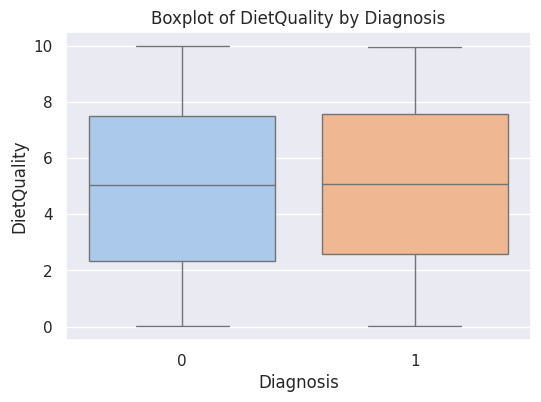

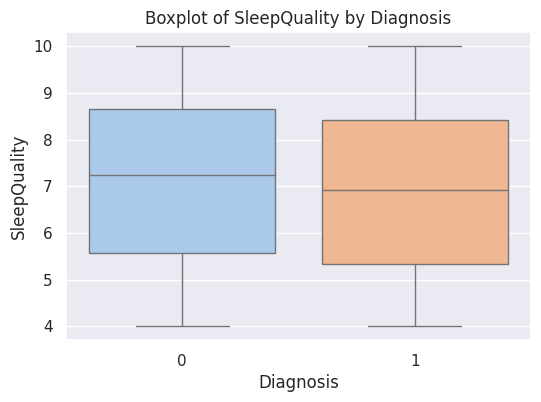

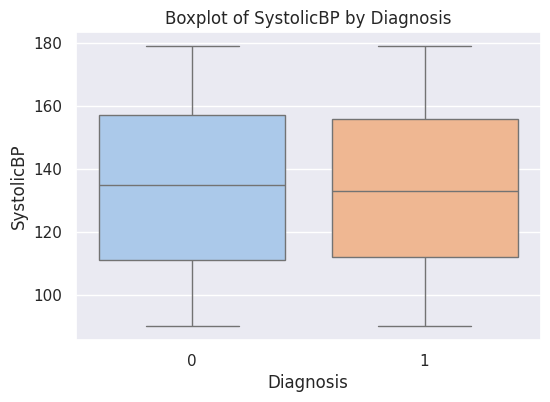

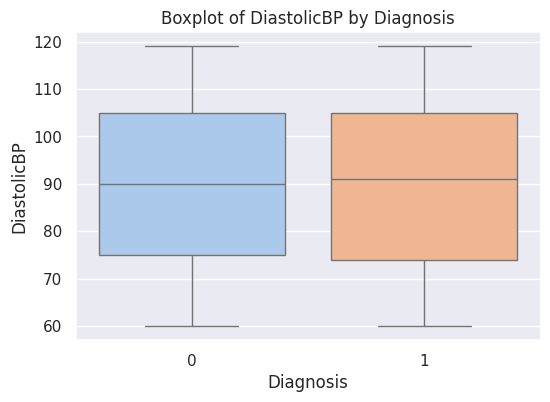

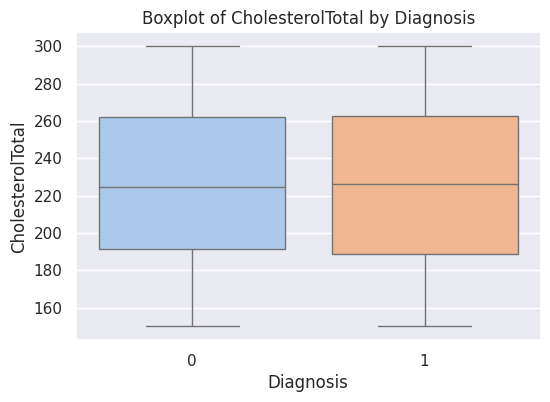

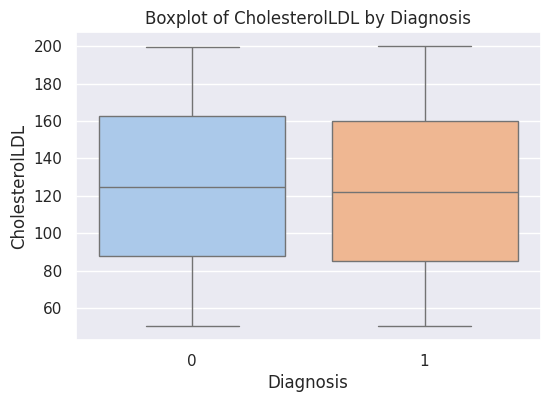

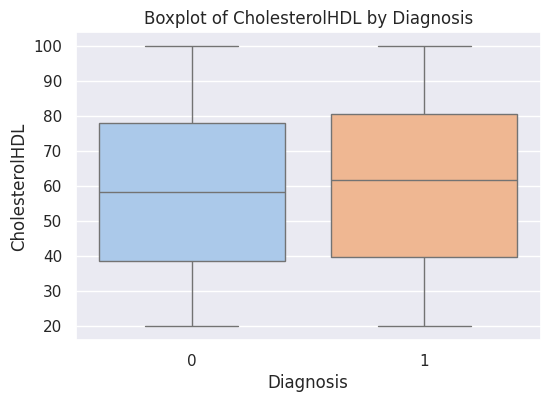

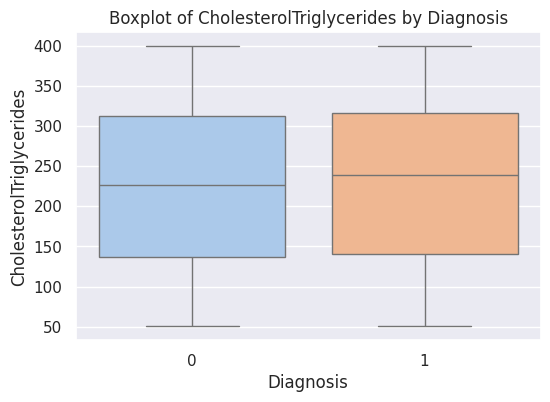

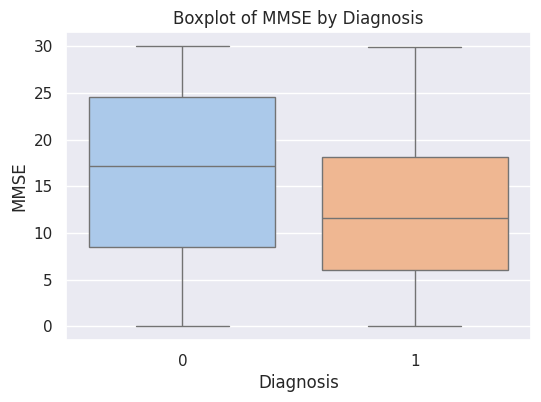

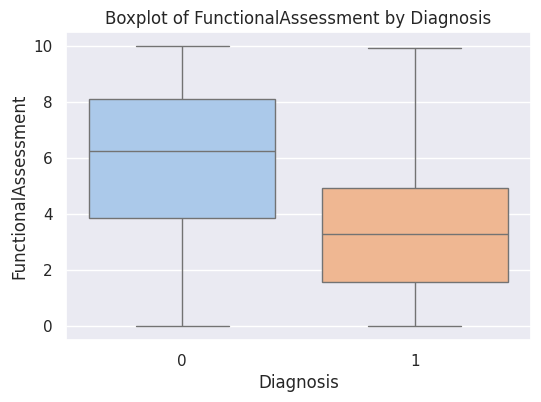

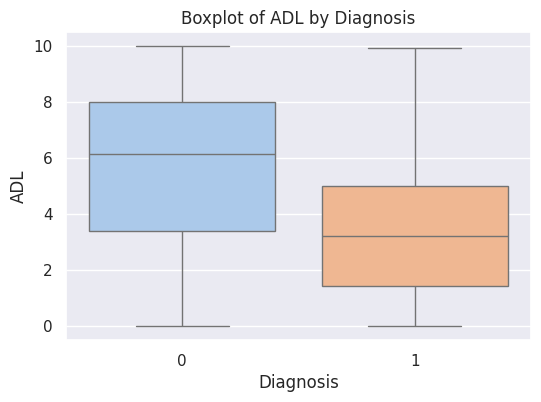

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Diagnosis', y=col, data=df, palette='pastel')
    plt.title(f"Boxplot of {col} by Diagnosis")
    plt.show()


####Cách khác: Density plot

ta sẽ thấy được hình dáng của phân bố

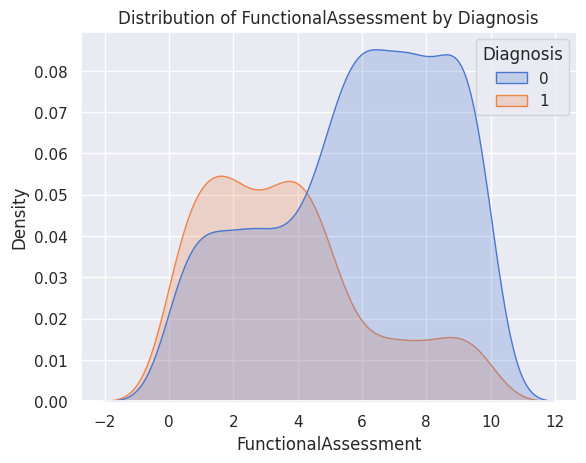

In [ ]:
sns.kdeplot(data=df, x='FunctionalAssessment', hue='Diagnosis', fill=True)
plt.title('Distribution of FunctionalAssessment by Diagnosis')
plt.show()

###Biến phân loại

####Quan sát:
- Tỉ lệ lớp 0/1 khá cân đối với đa số các biến  Gender, Confusion, Depression, Diabetes, ...
- Với BehavioralProblems, Ethnicity, EducationLeval, MemoryComplaints, Hypertension: có sự chênh lệch lớn hơn về số lớp 0/1.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def pieplot(col, val):

# Filter the data
  subset = df[df[col] == val]

# Count target values within that subset
  counts = subset['Diagnosis'].value_counts(normalize=True)

# Plot
  plt.figure(figsize=(5,5))
  plt.pie(counts, labels=[f'Diagnosis = {i}' for i in counts.index],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
  plt.title(f'Diagnosis Distribution when {col} = {val}')
  plt.show()


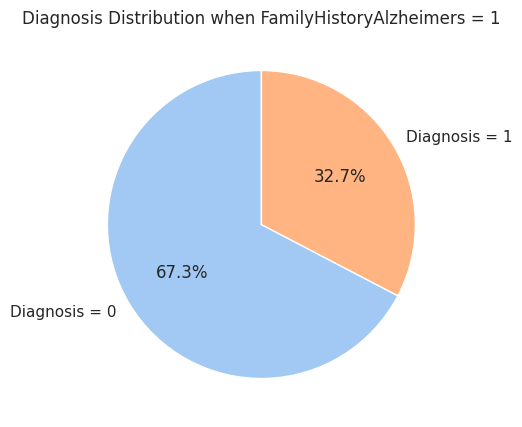

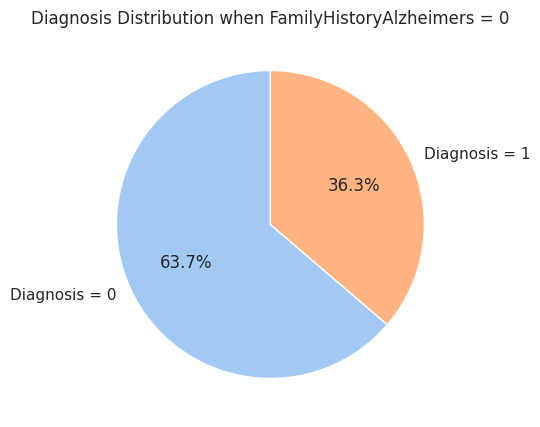

In [ ]:
pieplot('FamilyHistoryAlzheimers', 1)
pieplot('FamilyHistoryAlzheimers', 0)

FamilyHistoryAlzheimers có vẻ không ảnh hưởng nhiều đến khả năng mắc Alzheimers.

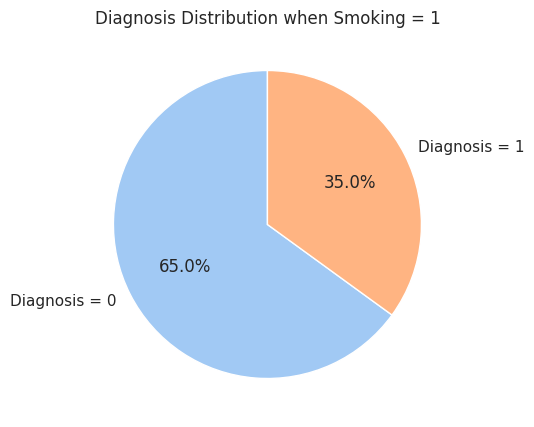

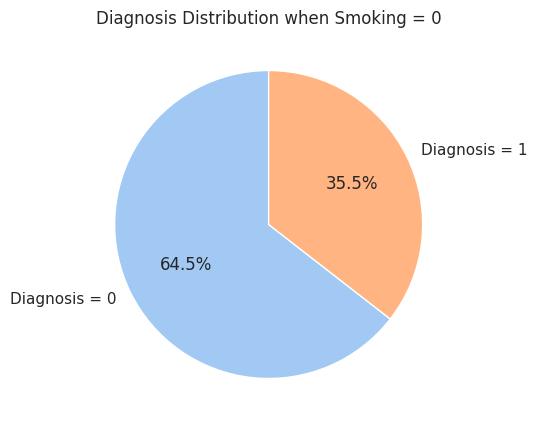

In [ ]:
pieplot('Smoking', 1)
pieplot('Smoking', 0)

Smoking cũng vậy.

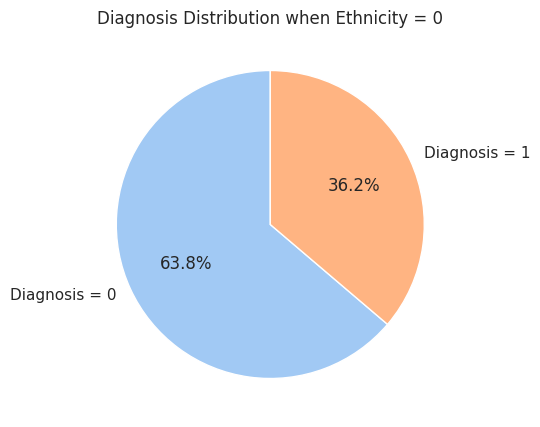

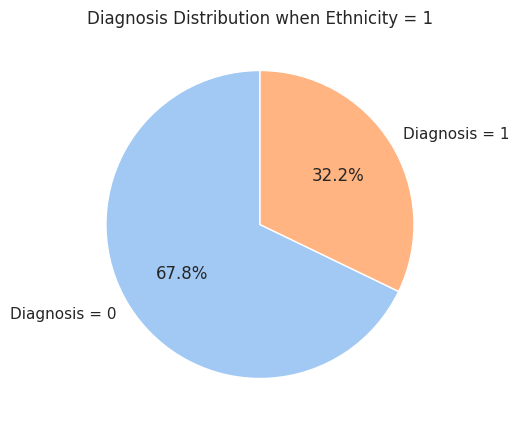

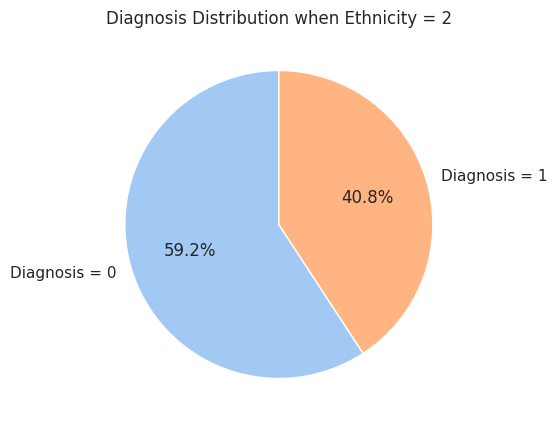

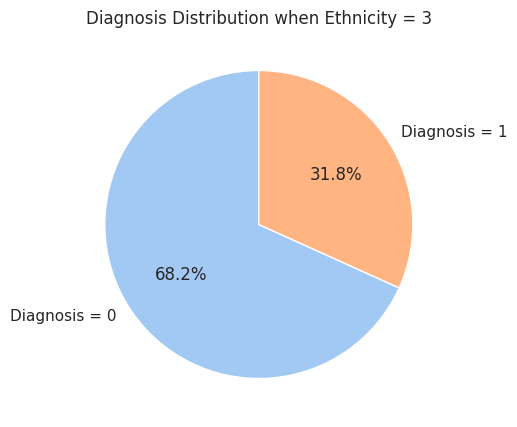

In [ ]:
pieplot('Ethnicity', 0)
pieplot('Ethnicity', 1)
pieplot('Ethnicity', 2)
pieplot('Ethnicity', 3)

Châu Á (label = 2) có tỉ lệ mắc bệnh cao nhất (40.8%), Caucasian xếp thứ hai (36.2%).

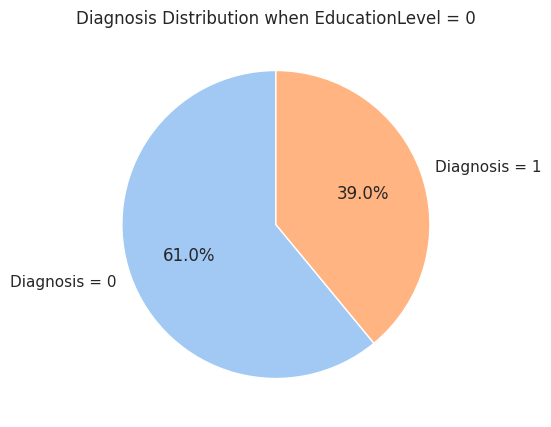

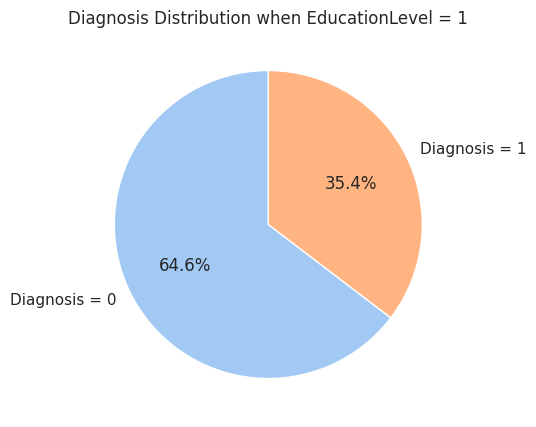

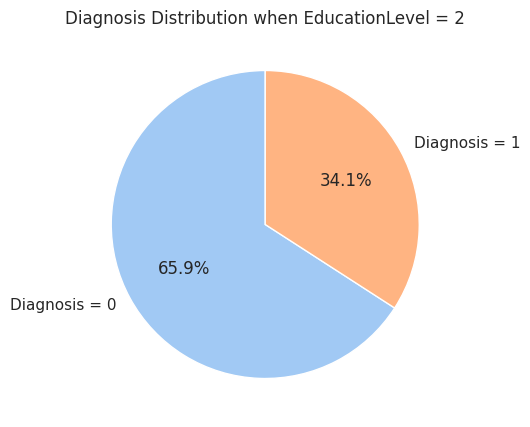

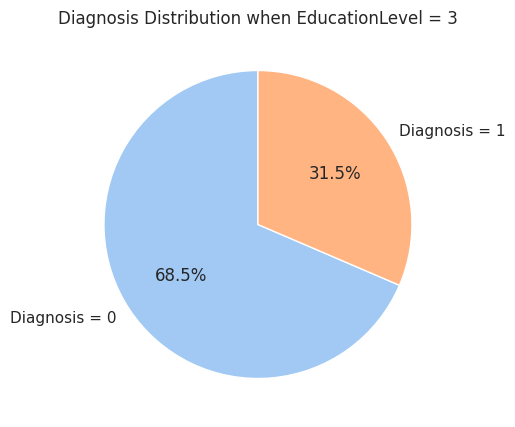

In [ ]:
pieplot('EducationLevel', 0)
pieplot('EducationLevel', 1)
pieplot('EducationLevel', 2)
pieplot('EducationLevel', 3)

EducationLevel = 0 có tỉ lệ mắc bệnh cao nhất, tỉ lệ này giảm dần với loại 1, 2.

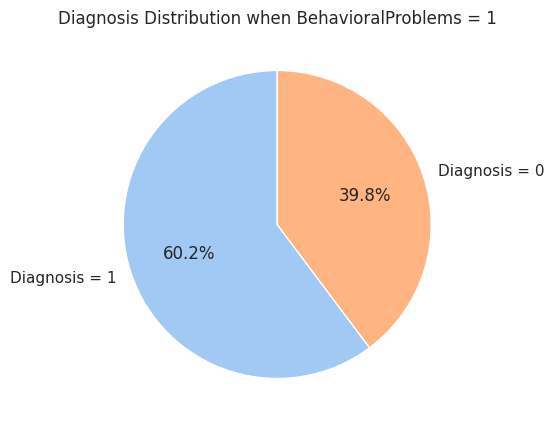

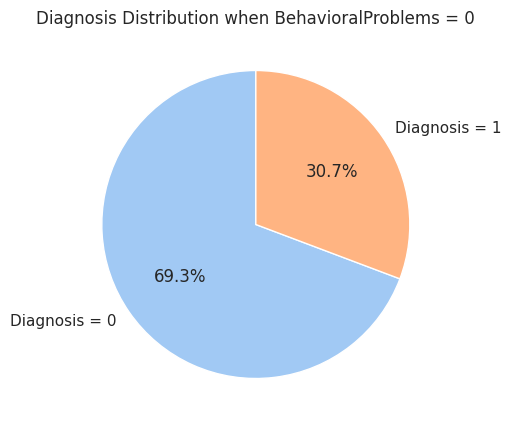

In [ ]:
pieplot('BehavioralProblems', 1)
pieplot('BehavioralProblems', 0)

9% chênh lệch với biến BehavioralProblems.

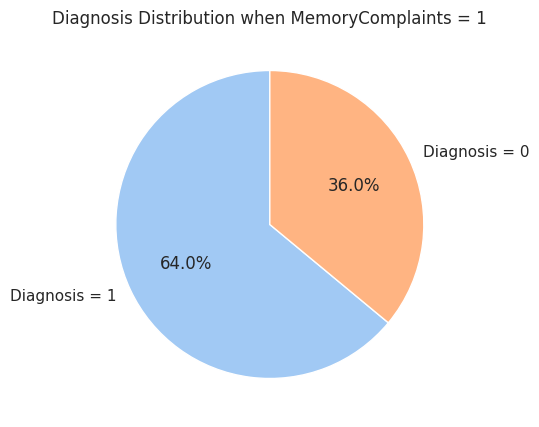

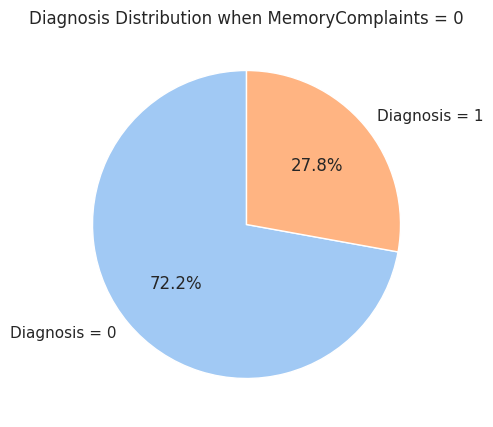

In [ ]:
pieplot('MemoryComplaints', 1)
pieplot('MemoryComplaints', 0)

MemoryComplaints cũng cho thấy mức chênh lệch khá rõ ràng.

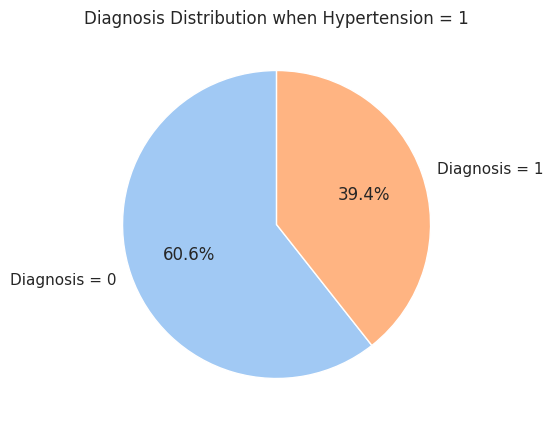

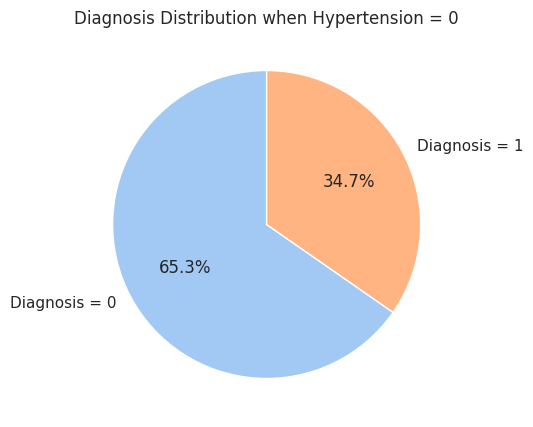

In [ ]:
pieplot('Hypertension', 1)
pieplot('Hypertension', 0)

##Tương quan

Pearson correlation ko cần chuẩn hóa. (nhưng PCA, clustering, LogisticRegression, SVM, ... cần chuẩn hóa)

- Yêu cầu dữ liệu là số.

- Biến phân loại với các lớp như (1, 2, 3) thì khoảng cách giữa các giá trị được coi là có ý nghĩa nên với các biến phân loại không có thự tự thì nên chuyển thành one-hot encoding.

**Với bộ data này:**

EducationLevel và Ethnicity có thể coi là có hoặc ko có thứ tự đều được.

**Giữ nguyên các biến**

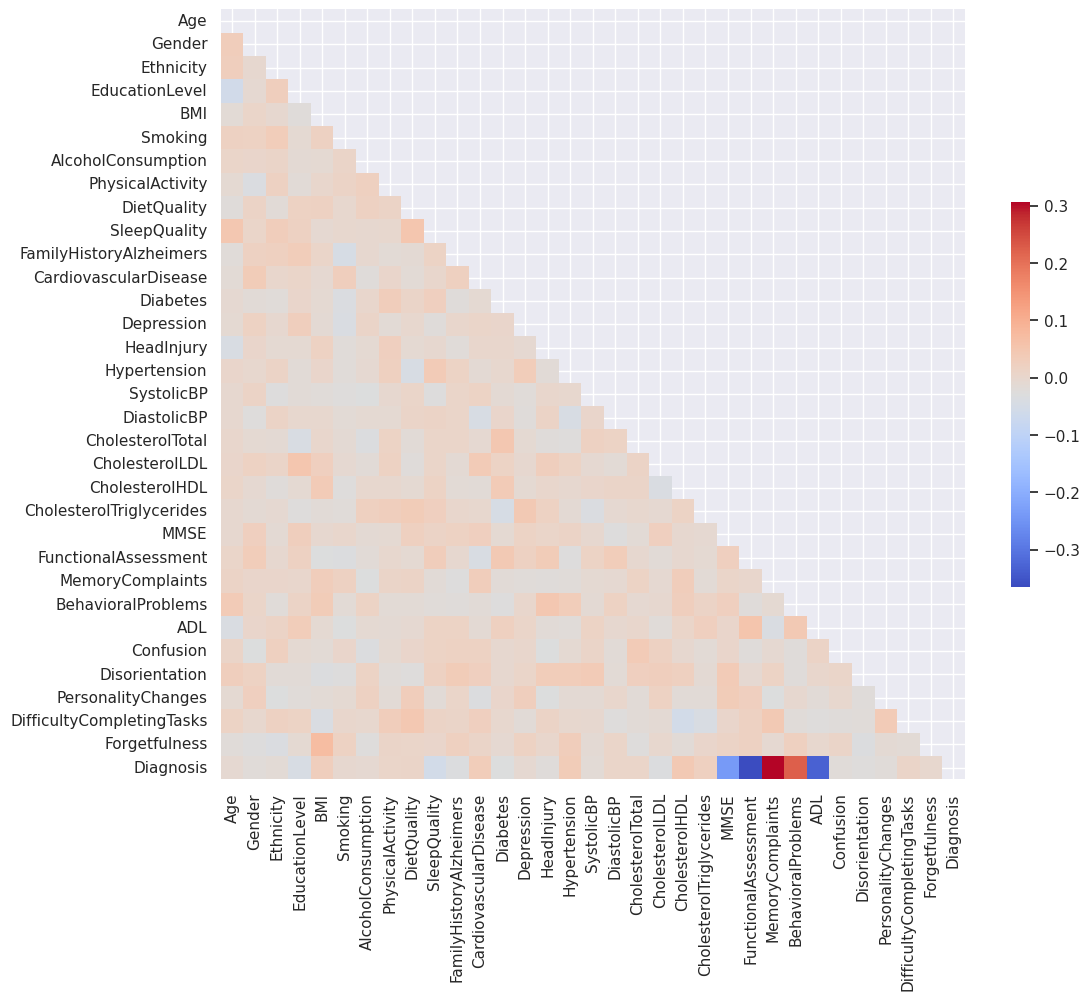

In [ ]:
# Create a mask to hide the upper triangle of the corr matrix
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

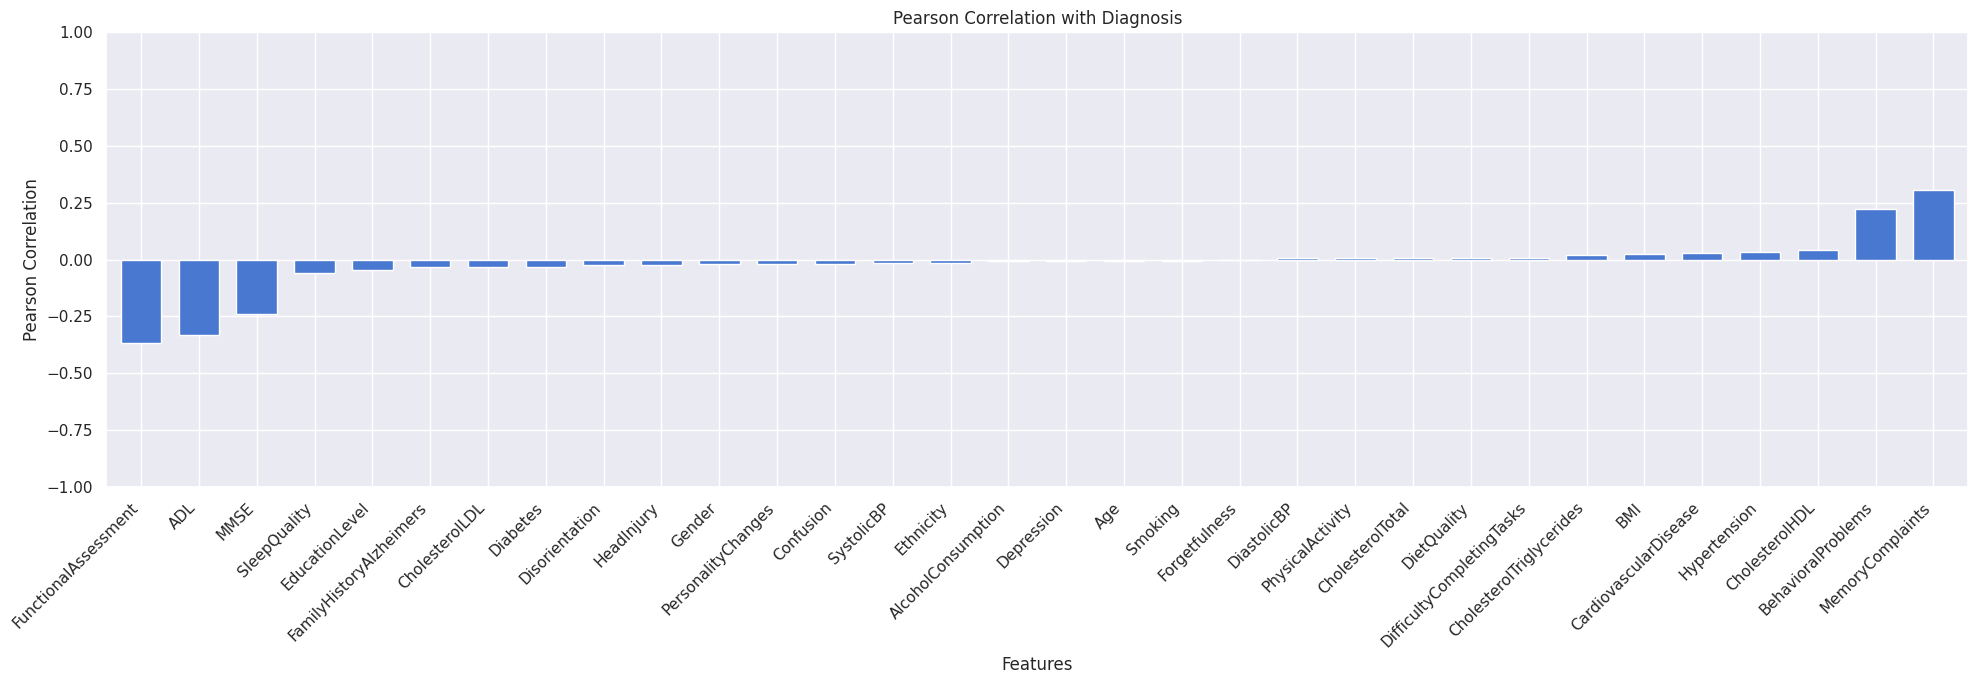

In [ ]:
# Compute Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()

# Set the size of the figure
plt.figure(figsize=(20, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features',
       title='Pearson Correlation with Diagnosis')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

####**Nhận xét:**
MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL có giá trị tương quan lớn nhất, các biến khác đều gần 0.

Các biểu đồ phía trên cũng cho thấy xu hướng tương tự.

**Sau khi one-hot encoding**

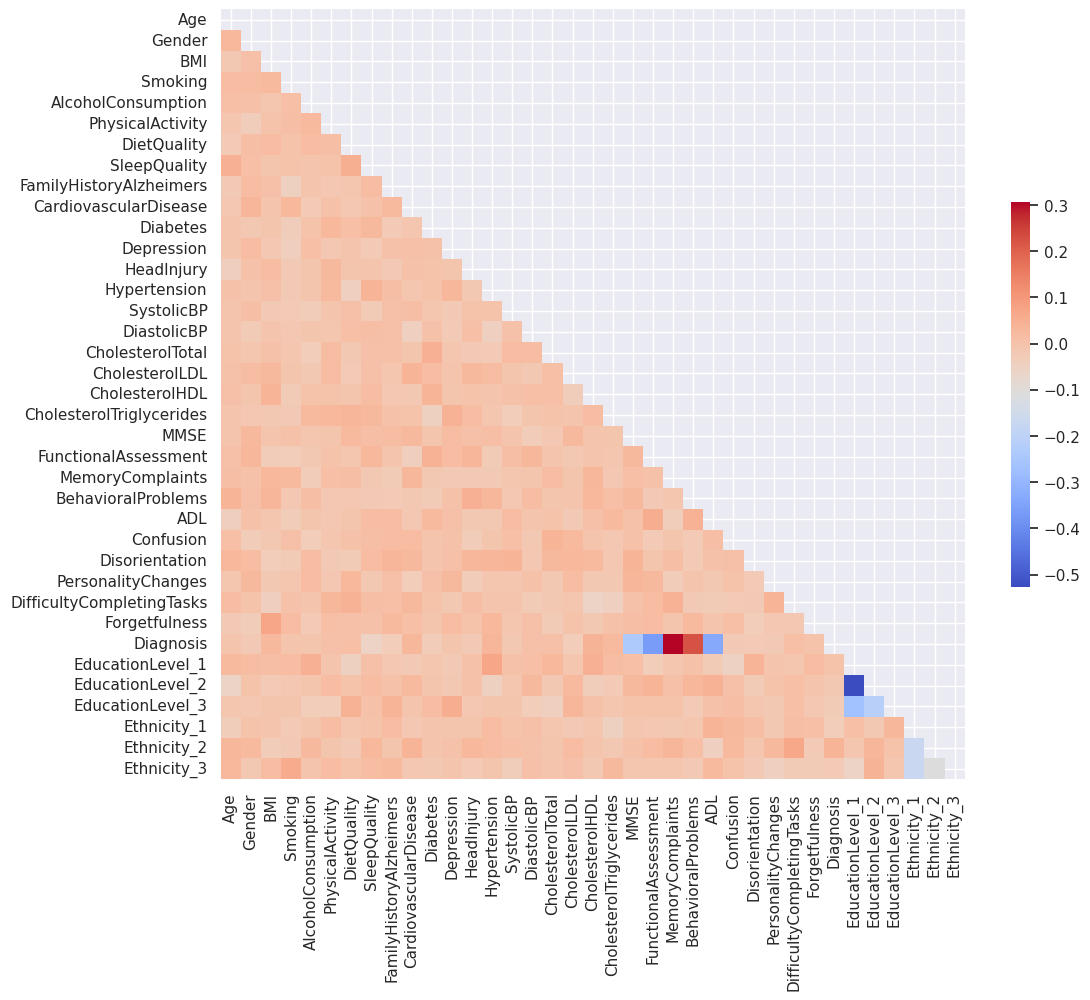

In [ ]:
df_encoded = pd.get_dummies(df, columns=['EducationLevel', 'Ethnicity'], drop_first=True)

# Create a mask to hide the upper triangle of the corr matrix
mask = np.triu(np.ones_like(df_encoded.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

plt.show()


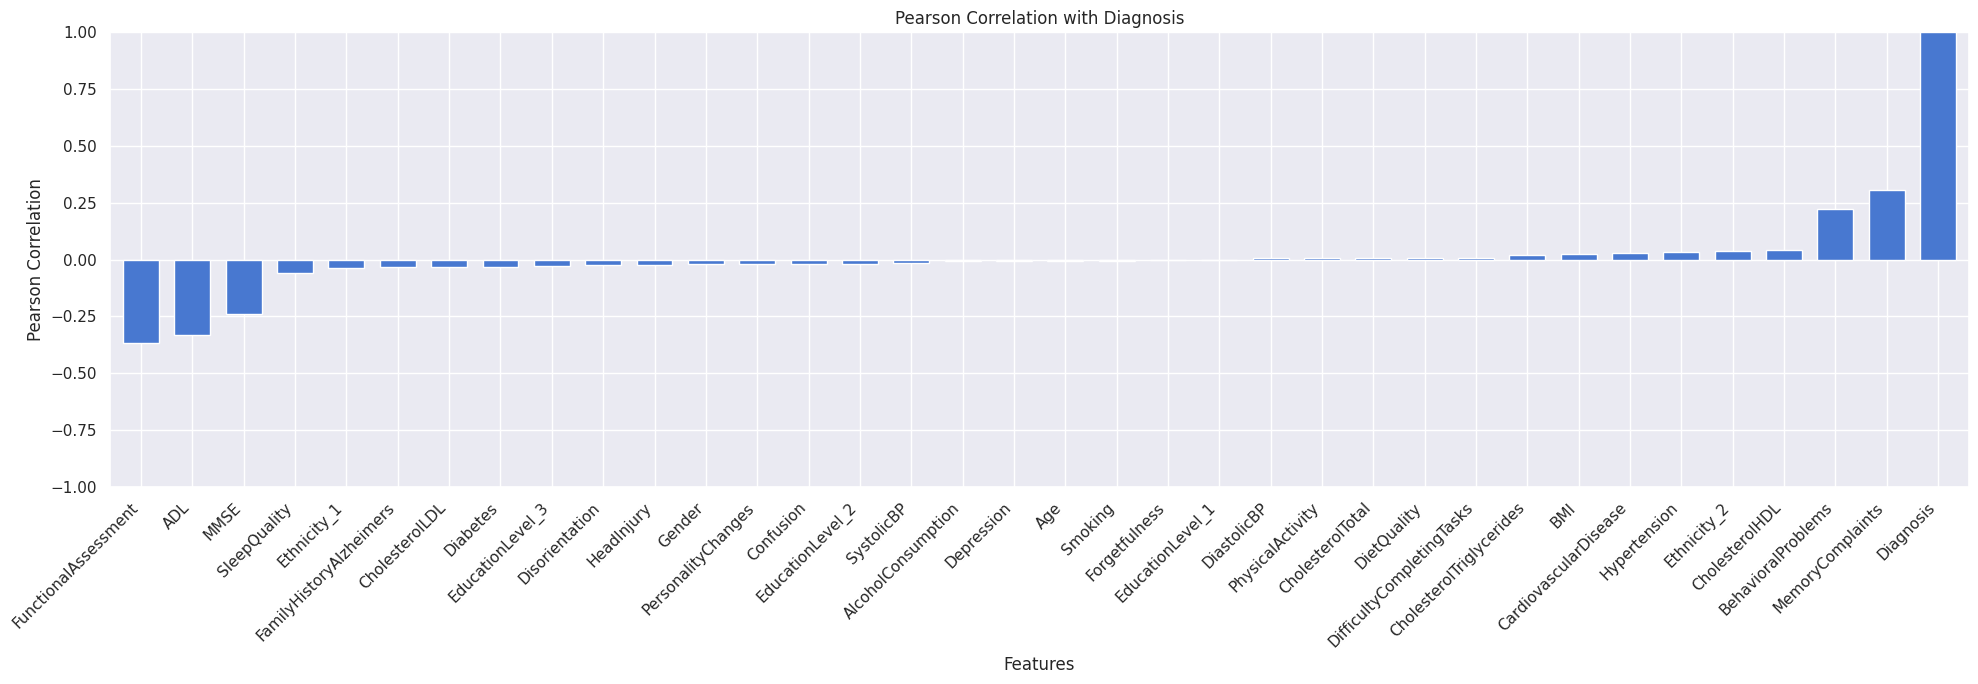

In [ ]:
# Compute Pearson correlation coefficients
correlations = df_encoded.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()

# Set the size of the figure
plt.figure(figsize=(20, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features',
       title='Pearson Correlation with Diagnosis')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Giống kết quả trước khi encode.

Ethnicity và EducationLevel không cho thấy quan hệ tuyến tính mạnh với biến mục tiêu.

##Giảm chiều

In [ ]:
X = df.drop('Diagnosis', axis=1)
#axis=1 argument indicates that we are dropping a column (as opposed to a row)
y = df['Diagnosis']

In [ ]:
print(X.shape)
print(y.shape)

(2149, 32)
(2149,)


###Chuẩn hóa


- Binary: keep as-is
- Numeric categorical (ordinal): keep numeric if order is meaningful; otherwise, one-hot encode
- Nominal: one-hot encode
- Continuous numeric: standardize (mean = 0, std = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
# Example: feature types
binary_cols = ['BehavioralProblems', 'CardiovascularDisease', 'Confusion', 'Depression', 'Diabetes', 'DifficultyCompletingTasks', 'Disorientation', 'FamilyHistoryAlzheimers', 'Forgetfulness', 'Gender', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'PersonalityChanges', 'Smoking']
ordinal_cols = ['EducationLevel']        # if truly ordinal
nominal_cols = ['Ethnicity']   # nominal categories
continuous_cols = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),
        ('bin', 'passthrough', binary_cols),
        ('ord', OneHotEncoder(drop='first'), ordinal_cols),
        ('cat', OneHotEncoder(drop='first'), nominal_cols)
        #When drop='first' is set to True, it removes the first category for each feature being one-hot encoded.
        #This is often done to avoid multicollinearity in linear models, as the information about the dropped category is implicitly contained in the remaining columns.
    ]
)


# Apply transformation
X_processed = preprocessor.fit_transform(X)

# X_processed is now ready for PCA, t-SNE, etc.


In [ ]:
# Get the column names after preprocessing
processed_feature_names = preprocessor.get_feature_names_out()
print(processed_feature_names)

['num__Age' 'num__BMI' 'num__AlcoholConsumption' 'num__PhysicalActivity'
 'num__DietQuality' 'num__SleepQuality' 'num__SystolicBP'
 'num__DiastolicBP' 'num__CholesterolTotal' 'num__CholesterolLDL'
 'num__CholesterolHDL' 'num__CholesterolTriglycerides' 'num__MMSE'
 'num__FunctionalAssessment' 'num__ADL' 'bin__BehavioralProblems'
 'bin__CardiovascularDisease' 'bin__Confusion' 'bin__Depression'
 'bin__Diabetes' 'bin__DifficultyCompletingTasks' 'bin__Disorientation'
 'bin__FamilyHistoryAlzheimers' 'bin__Forgetfulness' 'bin__Gender'
 'bin__HeadInjury' 'bin__Hypertension' 'bin__MemoryComplaints'
 'bin__PersonalityChanges' 'bin__Smoking' 'ord__EducationLevel_1'
 'ord__EducationLevel_2' 'ord__EducationLevel_3' 'cat__Ethnicity_1'
 'cat__Ethnicity_2' 'cat__Ethnicity_3']


In [ ]:
print(X_processed)

[[-0.21236841 -0.65522531  0.56592307 ...  0.          0.
   0.        ]
 [ 1.56775727 -0.11475103 -0.95489457 ...  0.          0.
   0.        ]
 [-0.21236841 -1.36642797  1.65300553 ...  0.          0.
   1.        ]
 ...
 [ 0.23266301 -1.68786382 -0.94583599 ...  0.          0.
   0.        ]
 [ 0.34392086 -1.71233356 -0.23710932 ...  0.          0.
   1.        ]
 [-0.32362627  0.78079682 -0.37326713 ...  0.          0.
   0.        ]]


###PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_processed)


In [ ]:
print(X_pca.shape)

(2149, 36)


In [ ]:
# --- 3. Create a dataframe for PCA results ---
pca_df = pd.DataFrame(
    X_pca,
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]
)
pca_df['Diagnosis'] = y.values

print(pca_df)
#the different values we see for each sample in X_pca represent where that sample is located along each of the principal component axes.

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -0.246527  0.182786  0.920270 -0.085908 -1.177852  0.074670  0.103564   
1     0.112786 -0.940369  1.807336  1.276371  0.076576  0.948510 -2.203323   
2     0.071675  0.693153 -0.195675  1.155642 -1.133429  1.682870 -0.215854   
3     1.408628  1.933804 -0.953906 -0.088885  0.157498 -0.546843  0.508683   
4     0.858936 -0.480531 -0.257346  1.279311 -2.796688  0.542512 -0.076224   
...        ...       ...       ...       ...       ...       ...       ...   
2144 -0.111702 -0.975109 -2.294633  0.560984  1.760825  0.530821  0.771582   
2145  0.184082  2.793441 -1.260753  0.023186 -1.629462 -0.394997 -1.114350   
2146  0.756778  0.076978 -0.738975  0.500237  0.289693  1.600329  0.416506   
2147 -0.233015  0.533097 -1.048424  1.388138 -1.903083  0.417437 -0.647870   
2148 -0.087395  1.492890 -0.920275  0.587687  1.745220  0.688634 -0.017656   

           PC8       PC9      PC10      PC11      PC12      PC1

In [ ]:
#Print variance ratios
explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained) #total proportion of the original data's variance that is explained by the first n principal components combined.

explained_df = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(explained))],
    'Explained Var Ratio': explained,
    'Cumulative Var Ratio': cum_explained
})
print(explained_df)


      PC  Explained Var Ratio  Cumulative Var Ratio
0    PC1             0.061202              0.061202
1    PC2             0.060875              0.122077
2    PC3             0.058681              0.180758
3    PC4             0.058429              0.239187
4    PC5             0.057654              0.296841
5    PC6             0.056852              0.353693
6    PC7             0.055949              0.409643
7    PC8             0.055149              0.464792
8    PC9             0.054112              0.518904
9   PC10             0.053023              0.571927
10  PC11             0.052298              0.624225
11  PC12             0.052040              0.676265
12  PC13             0.050716              0.726981
13  PC14             0.049886              0.776867
14  PC15             0.048383              0.825250
15  PC16             0.018666              0.843916
16  PC17             0.013777              0.857693
17  PC18             0.011674              0.869367
18  PC19    

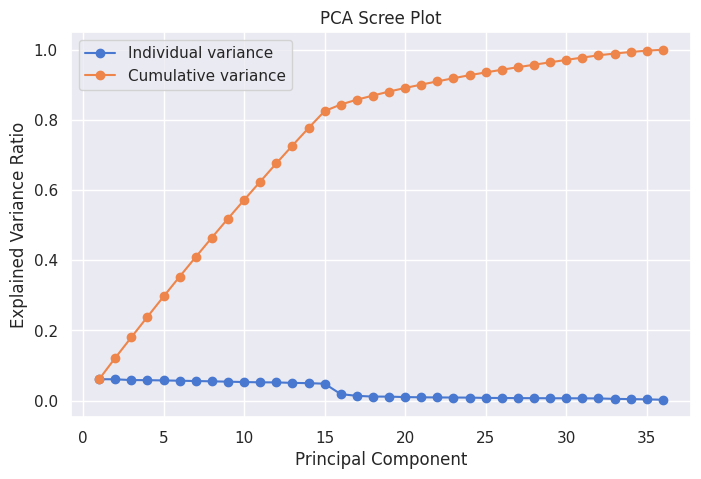

In [ ]:
#Plot scree plot (variance per PC)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained)+1), explained, marker='o', label='Individual variance')
plt.plot(range(1, len(explained)+1), cum_explained, marker='o', label='Cumulative variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Scree Plot')
plt.legend()
plt.grid(True)
plt.show()


PC1 chỉ giải thích được 6% variance.

Đến PC15 ta mới giữ được trên 80% dữ liệu ban đầu.

Variance giải thích được bởi mỗi PC đều rất thấp, qua PC16 tỉ lệ càng thấp hơn, gần như bằng 0.



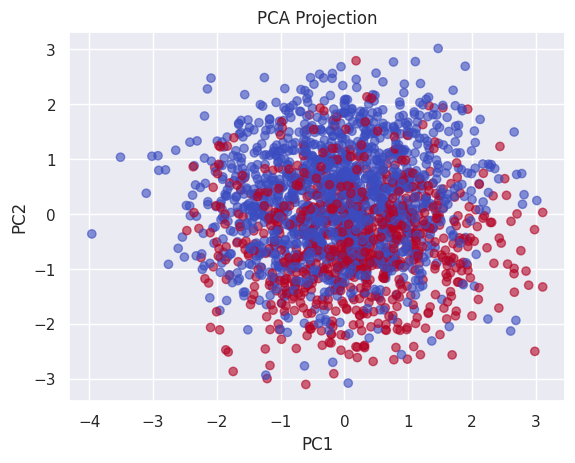

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.6)
#coloring the points based on the y values: 'coolwarm' is a common colormap that transitions from cool colors (like blue for 0) to warm colors (like red for 1).
#alpha=0.6 makes the point semi-transparent
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()
#Visualize data by the first two PCs

2 lớp mục tiêu ko thể phân tách rõ ràng với PC1 và PC2.

In [ ]:
TARGET = 'Diagnosis'

In [ ]:
#Pairwise scatter plots for first few PCs

sns.pairplot(
    pca_df,
    vars=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
          'PC7', 'PC8', 'PC9', 'PC10'],
    hue=TARGET,
    palette='Set2',
    corner=True,
    plot_kws={'alpha':0.7, 's':30}
)
plt.suptitle("Pairwise Scatter of First Four Principal Components", y=1.02)
plt.show()

#This shows structure or clusters in low-dimensional PCA space.


NameError: name 'sns' is not defined

Các pairplots của các cặp PCs đều cho thấy 2 lớp mục tiêu bị trùng lặp rất nhiều. Các cặp PCs không thể tách biệt rõ ràng 2 lớp mục tiêu.

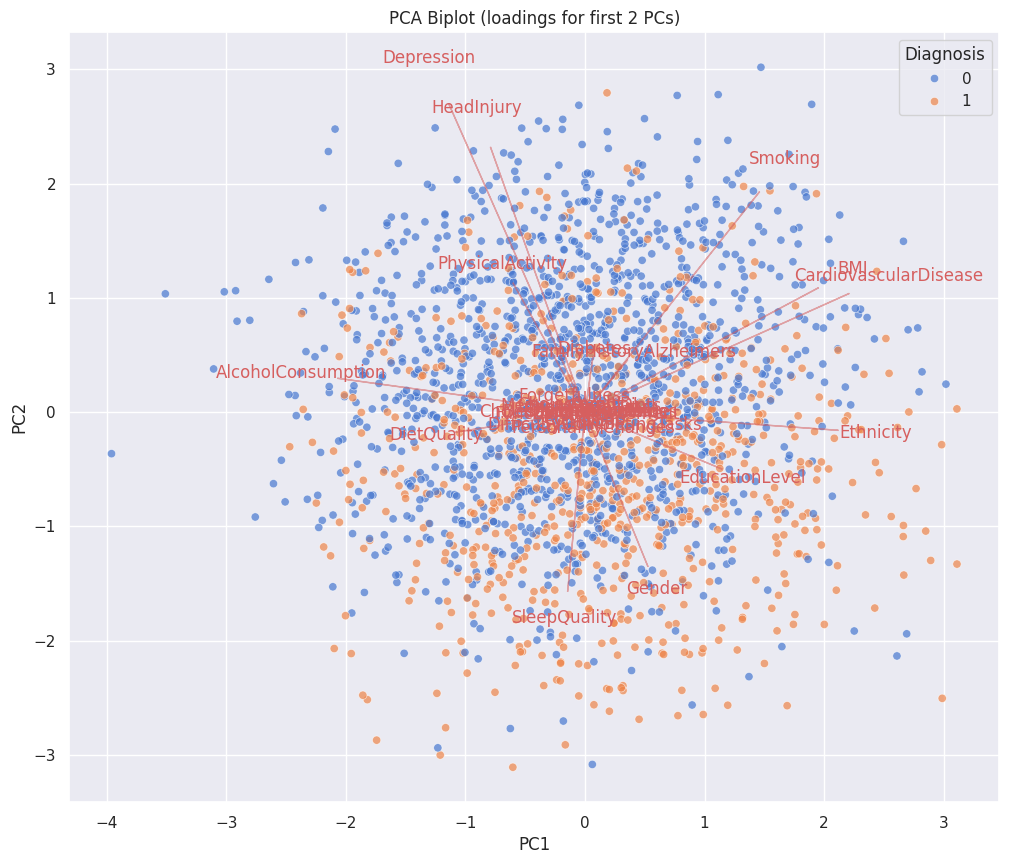

In [ ]:
#Optional — visualize feature loadings (biplot)
plt.figure(figsize=(12,10))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=TARGET, alpha=0.7)
for i, feature in enumerate(X.columns):
    plt.arrow(0, 0,
              pca.components_[0, i]*5,
              pca.components_[1, i]*5,
              color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*5*1.15,
             pca.components_[1, i]*5*1.15,
             feature, color='r', ha='center', va='center')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot (loadings for first 2 PCs)')
plt.grid(True)
plt.show()

#Red arrows = features.

#Direction = correlation with PCs.

#Features pointing in the same direction are correlated.

Tất cả các vector đặc trưng đều hướng về những hướng khác nhau, cho thấy rằng các đặc trưng phần lớn không tương quan với nhau và đóng góp theo nhiều hướng độc lập vào hai thành phần chính (2 PCs).

→ Cấu trúc dữ liệu phức tạp, không có trục biến thiên chi phối.

#####**Dữ liệu giảm chiều bằng PCA**

In [ ]:
# Choose the number of principal components to keep
n_components_to_keep = 16

# Select the first 'n_components_to_keep' columns from X_pca
X_pca_reduced = X_pca[:, :n_components_to_keep]

# Create a new DataFrame with the reduced PCA data
# We can also add the 'Diagnosis' column back if you plan to use this for modeling
df_pca_reduced = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(n_components_to_keep)])
df_pca_reduced['Diagnosis'] = y.values

# Display the first few rows of the reduced dataset
print("Shape of the original preprocessed data:", X_processed.shape)
print("Shape of the reduced PCA data:", df_pca_reduced.shape)
display(df_pca_reduced.head())

Shape of the original preprocessed data: (2149, 36)
Shape of the reduced PCA data: (2149, 17)


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.246527  0.182786  0.920270 -0.085908 -1.177852  0.074670  0.103564   
1  0.112786 -0.940369  1.807336  1.276371  0.076576  0.948510 -2.203323   
2  0.071675  0.693153 -0.195675  1.155642 -1.133429  1.682870 -0.215854   
3  1.408628  1.933804 -0.953906 -0.088885  0.157498 -0.546843  0.508683   
4  0.858936 -0.480531 -0.257346  1.279311 -2.796688  0.542512 -0.076224   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.871236  0.627160  0.604907  1.247287 -1.313964 -0.244724  0.271794   
1  0.330875  0.867723  0.380350 -1.145525 -0.353922  0.304812  0.604011   
2 -1.654299  1.025632  0.017036  2.076431  0.450595 -2.175590 -0.358096   
3 -1.099233  1.592411 -0.270908 -0.723116 -0.725284  0.420689 -0.534727   
4 -1.168785  0.956844  1.837773  0.083305  0.297219  0.850172 -0.146352   

       PC15      PC16  Diagnosis  
0 -2.023633 -0.818308          0  
1  0.273875 -0.177013          0  
2  0.283583  0.595348          0  
3 -0.344800  0.736224          0  
4 -0.116578 -0.299439          0

###LDA

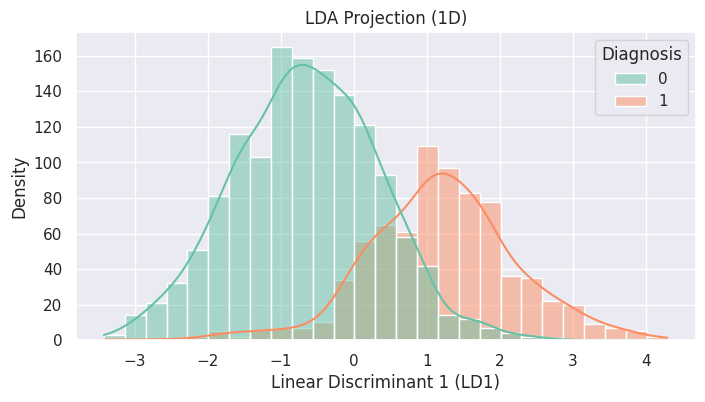

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize LDA
# n_components: The number of components to reduce to. For a binary classification
# problem, LDA can find at most n_classes - 1 components, which is 1 in this case.
lda = LinearDiscriminantAnalysis(n_components=1)

# Fit and transform the processed data using the target variable
X_lda = lda.fit_transform(X_processed, y)

# Create a DataFrame for LDA results for easier plotting
lda_df = pd.DataFrame(X_lda, columns=['LD1'])
lda_df['Diagnosis'] = y.values

# Visualize the LDA-transformed data (1D scatter plot or histogram)
plt.figure(figsize=(8, 4))
sns.histplot(data=lda_df, x='LD1', hue='Diagnosis', kde=True, palette='Set2')
plt.title('LDA Projection (1D)')
plt.xlabel('Linear Discriminant 1 (LD1)')
plt.ylabel('Density')
plt.show()

# Since it's 1D, you could also use a strip plot or swarm plot for individual points
# plt.figure(figsize=(8, 2))
# sns.stripplot(data=lda_df, x='LD1', y=['']*len(lda_df), hue='Diagnosis', palette='Set2', alpha=0.6, jitter=True)
# plt.title('LDA Projection (1D - Individual Points)')
# plt.xlabel('Linear Discriminant 1 (LD1)')
# plt.legend(title='Diagnosis')
# plt.yticks([]) # Hide the y-axis labels as they are just placeholders
# plt.show()

2 lớp mục tiêu có 2 đỉnh rõ ràng hơn các PCs nhưng vẫn chồng lấn rất nhiều.

In [ ]:
print(X_lda.shape)
print(X_lda) #projection of preprocessed data (X_processed) onto the linear discriminant axis (LD1)

(2149, 1)
[[-0.4718232 ]
 [-0.73668315]
 [-1.16282573]
 ...
 [ 0.30013086]
 [ 0.38804667]
 [ 0.05016573]]


In [ ]:
print(lda.coef_)
#show how each original feature contributes to the discriminant

[[-1.09070140e-01 -1.91017402e-02 -5.17772338e-02 -3.69706380e-03
   2.84626552e-02 -1.08599000e-01 -1.20071210e-02  2.34720830e-02
  -2.49744951e-03 -1.22528446e-01  9.72226637e-02  9.55563734e-02
  -8.71267182e-01 -1.25650055e+00 -1.16319597e+00  2.42897730e+00
   1.68484478e-01 -1.35233126e-01  7.66178834e-02 -5.72913809e-03
   1.12494509e-02 -1.41793726e-01 -1.05097200e-01  3.13921530e-02
  -2.60727456e-02 -2.69726026e-01  2.58769178e-01  2.72367541e+00
  -2.02064344e-02 -2.05682402e-01 -2.86661376e-01 -1.68992569e-01
  -4.36512000e-01 -2.04308425e-01  1.92299177e-01 -2.10785151e-01]]


In [ ]:
print(lda.intercept_)

[-1.7078354]


In [ ]:
print(lda.means_) #average values for each feature within each class.
print(lda.priors_) #the assumed class probabilities. By default, this is based on class frequencies in the training data.

[[ 0.00405975 -0.01948578  0.00563501 -0.00439755 -0.00629172  0.04182862
   0.01155059 -0.003915   -0.00472998  0.02365252 -0.03149942 -0.01677039
   0.17540183  0.26991531  0.24583631  0.09647228  0.13606911  0.21094312
   0.20230382  0.15910727  0.1562275   0.16486681  0.26277898  0.30165587
   0.51403888  0.09719222  0.13966883  0.11591073  0.1562275   0.29013679
   0.39740821  0.30165587  0.10511159  0.22174226  0.08783297  0.10367171]
 [-0.00741973  0.03561283 -0.01029873  0.0080371   0.01149895 -0.07644731
  -0.02111022  0.00715517  0.00864467 -0.0432281   0.05756933  0.03065009
  -0.32056993 -0.49330575 -0.44929819  0.26710526  0.15921053  0.19473684
   0.19736842  0.13552632  0.16315789  0.14605263  0.23289474  0.30131579
   0.49210526  0.08421053  0.16578947  0.37631579  0.14078947  0.28552632
   0.39736842  0.28552632  0.08815789  0.19210526  0.11052632  0.08815789]]
[0.64634714 0.35365286]


**Bộ dữ liệu đã giảm chiều bằng LDA**

In [ ]:
print(lda_df.shape)
print(lda_df)
#Can apply linear classification models like Logistic Regression, linear SVM

(2149, 2)
           LD1  Diagnosis
0    -0.471823          0
1    -0.736683          0
2    -1.162826          0
3    -0.373574          0
4     0.574224          0
...        ...        ...
2144  1.600273          1
2145 -0.286806          1
2146  0.300131          1
2147  0.388047          1
2148  0.050166          0

[2149 rows x 2 columns]


###UMAP

In [ ]:
!pip install umap-learn

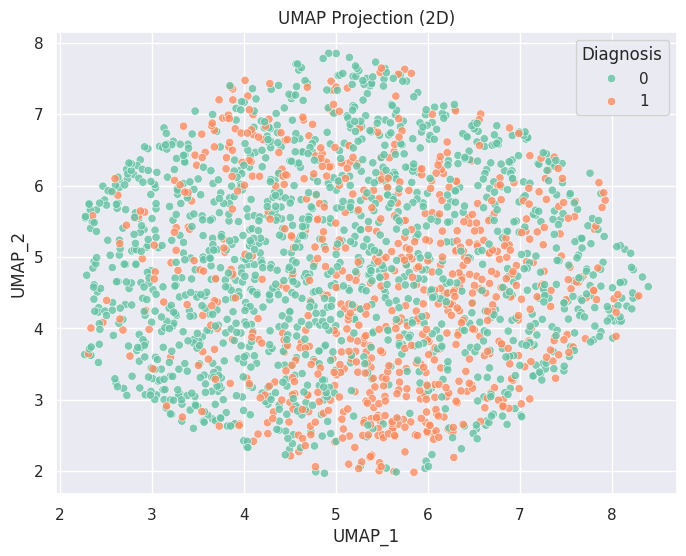

In [ ]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize UMAP
# n_components: The number of dimensions to reduce to (e.g., 2 for visualization)
# n_neighbors: Controls the balance between local and global structure (smaller value focuses on local)
# min_dist: Controls how tightly packed the embedded points are (smaller value allows points to be closer)
umap_reducer = umap.UMAP(n_components=2, random_state=42)

# Fit and transform the processed data
X_umap = umap_reducer.fit_transform(X_processed)

# Create a DataFrame for UMAP results for easier plotting
umap_df = pd.DataFrame(X_umap, columns=['UMAP_1', 'UMAP_2'])
umap_df['Diagnosis'] = y.values

# Visualize the UMAP-transformed data
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=umap_df,
    x='UMAP_1', y='UMAP_2',
    hue='Diagnosis',
    palette='Set2',
    alpha=0.8
)
plt.title('UMAP Projection (2D)')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.legend(title='Diagnosis')
plt.grid(True)
plt.show()

Không phát hiện được cụm rõ ràng. Vẫn có sự chồng lấn đáng kể giữa các nhóm. Tuy nhiên, có nhiều điểm màu xanh lá hơn ở phía bên phải (giá trị UMAP_1 lớn hơn).

In [ ]:
import umap
import plotly.express as px
import pandas as pd

# Initialize UMAP with 3 components
umap_reducer_3d = umap.UMAP(n_components=3, random_state=42)

# Fit and transform the processed data (using X_processed from earlier)
X_umap_3d = umap_reducer_3d.fit_transform(X_processed)

# Create a DataFrame for 3D UMAP results
umap_3d_df = pd.DataFrame(X_umap_3d, columns=['UMAP_1', 'UMAP_2', 'UMAP_3'])
umap_3d_df['Diagnosis'] = y.values

# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(
    umap_3d_df,
    x='UMAP_1',
    y='UMAP_2',
    z='UMAP_3',
    color='Diagnosis',
    title='UMAP Projection (3D)',
    labels={'UMAP_1': 'UMAP_1', 'UMAP_2': 'UMAP_2', 'UMAP_3': 'UMAP_3'}
)

fig.show()

Phát hiện nhiều mẫu thuộc lớp 1 hơn ở các giá trị UMAP_1 nhỏ, và nhiều mẫu thuộc lớp 0 hơn ở các giá trị UMAP_1 lớn. Tuy nhiên, vẫn không có cụm rõ ràng.

####**UMAP có giám sát**

In [ ]:
import umap
import plotly.express as px
import pandas as pd

# Initialize UMAP with 2 components for 2D visualization
# We will use supervised UMAP by providing the target variable to fit_transform
umap_reducer_supervised_2d = umap.UMAP(
    n_components=2,
    random_state=42
    # You can still experiment with n_neighbors and min_dist here if desired
    # n_neighbors=30,
    # min_dist=0.1,
)

# Fit and transform the processed data using supervised UMAP
# Provide the target variable 'y' to the fit_transform method
try:
    X_umap_2d_supervised = umap_reducer_supervised_2d.fit_transform(X_processed, y)
except NameError:
    print("Error: X_processed or y is not defined. Please run the data preprocessing and splitting steps first.")
    X_umap_2d_supervised = None # Set to None to prevent further errors


if X_umap_2d_supervised is not None:
    # Create a DataFrame for 2D UMAP results
    umap_2d_df_supervised = pd.DataFrame(X_umap_2d_supervised, columns=['UMAP_1', 'UMAP_2'])
    # Ensure y is available from previous steps
    try:
        umap_2d_df_supervised['Diagnosis'] = y.values
    except NameError:
        # This should not happen if y was missing for fit_transform, but good practice
        print("Error: y is not defined for plotting.")
        umap_2d_df_supervised['Diagnosis'] = 'Unknown'


    # Create an interactive 2D scatter plot using Plotly
    fig = px.scatter(
        umap_2d_df_supervised,
        x='UMAP_1',
        y='UMAP_2',
        color='Diagnosis',
        title='Supervised UMAP Projection (2D)',
        labels={'UMAP_1': 'UMAP_1', 'UMAP_2': 'UMAP_2'},
        opacity=0.6, # Adjust opacity to make points more visible in dense areas
        size_max=3 # You could also adjust size_max if needed
    )

    fig.show()

Việc quan sát thấy các cụm riêng biệt trong biểu đồ UMAP có giám sát (supervised UMAP) cho ta biết nhiều điều quan trọng về bộ dữ liệu và mối quan hệ giữa các đặc trưng (features) với biến mục tiêu ‘Diagnosis’:

1. **Khả năng tách biệt phi tuyến (Non-linear Separability):**

Supervised UMAP là một kỹ thuật giảm chiều phi tuyến, và nó thể hiện rõ các cụm riêng biệt dựa trên chẩn đoán, điều này cho thấy hai lớp có thể tách biệt được — nhưng không phải bằng các ranh giới tuyến tính đơn giản (điều này lý giải tại sao PCA và UMAP không giám sát lại cho thấy sự chồng lấn nhiều hơn).
Sự tách biệt này đạt được nhờ việc bảo toàn các mối quan hệ và **cấu trúc phi tuyến** trong không gian dữ liệu gốc có liên quan đến nhãn lớp.

2. **Hiệu quả của nhúng có giám sát (Effectiveness of Supervised Embedding)**:

Bằng cách sử dụng thông tin về ‘Diagnosis’ trong quá trình nhúng, UMAP đã tìm ra một không gian có số chiều thấp hơn, nơi các đặc trưng được sắp xếp sao cho hai nhóm được phân tách rõ ràng.

3. **Tiềm năng của các mô hình phân loại phi tuyến (Potential for Non-linear Classifiers)**:

Sự xuất hiện của các cụm riêng biệt được tách theo kiểu phi tuyến trong không gian UMAP cho thấy rằng các mô hình phân loại phi tuyến (như mô hình cây quyết định, kernel SVM, hoặc mạng nơ-ron) có khả năng hoạt động tốt trên bộ dữ liệu này.
Những mô hình này có thể học được các ranh giới quyết định phức tạp và phi tuyến giữa các lớp.

4. **Cấu trúc tiềm ẩn của dữ liệu (Underlying Structure)**:

Các cụm thể hiện rằng có những tổ hợp và mẫu đặc trưng của các biến đầu vào (được phản ánh qua các thành phần UMAP) có tính đặc trưng cao cho từng nhóm chẩn đoán.
Nói cách khác, các cụm rõ ràng trong biểu đồ supervised UMAP cung cấp bằng chứng trực quan mạnh mẽ rằng biến ‘Diagnosis’ thực sự có thể được dự đoán từ các đặc trưng hiện có, và rằng **các phương pháp phi tuyến** là công cụ hữu ích để nắm bắt mối quan hệ này.
→ Đây là một dấu hiệu đầy hứa hẹn cho việc xây dựng mô hình phân loại hiệu quả.

##Tổng kết

#####**PCA (Principal Component Analysis):**

- **Mục tiêu (Goal)**: Tìm các thành phần trực giao (orthogonal components) nắm bắt được phương sai lớn nhất trong dữ liệu. Đây là một phương pháp không giám sát.

- **Phương pháp (Method)**: Thực hiện biến đổi tuyến tính trên các đặc trưng.

**Kết quả (Results)**:

PC1 chỉ giải thích được một tỷ lệ phương sai tương đối thấp (khoảng 6%), cho thấy dữ liệu có tính đa chiều và phương sai được phân tán trên nhiều đặc trưng khác nhau.

Biểu đồ PC1 so với PC2 (và các cặp khác) cho thấy mức độ chồng lấn đáng kể giữa hai nhóm chẩn đoán.

Cần giữ lại số lượng thành phần lớn hơn (khoảng 16) để bảo toàn được khoảng 85% tổng phương sai của dữ liệu.

**Kết luận (Takeaway):**
PCA hữu ích trong việc hiểu cấu trúc phương sai và giảm chiều dữ liệu mà vẫn bảo toàn phần lớn thông tin, tuy nhiên các thành phần đầu tiên không thể hiện được sự tách biệt tuyến tính rõ ràng giữa các lớp khi trực quan hóa.

#####**LDA (Linear Discriminant Analysis):**

- **Mục tiêu (Goal)**: Tìm các thành phần tuyến tính tối đa hóa sự tách biệt giữa các lớp đồng thời giảm thiểu phương sai trong cùng lớp. Đây là phương pháp có giám sát, sử dụng biến mục tiêu.

- **Phương pháp (Method)**: Biến đổi tuyến tính được thiết kế riêng cho việc phân biệt lớp. Số thành phần tối đa bị giới hạn bởi n_classes - 1.

**Kết quả (Results):**

LDA chỉ tạo ra một thành phần duy nhất (LD1) cho bài toán phân loại nhị phân.

Biểu đồ của LD1 cho thấy mức chồng lấn vừa phải giữa hai nhóm chẩn đoán, mặc dù có sự khác biệt nhẹ ở đỉnh phân phối.

**Kết luận (Takeaway):**
LDA tìm ra trục tuyến tính tốt nhất để tách các lớp. Dù có thể phân biệt phần nào, nhưng không tạo ra sự tách biệt tuyến tính hoàn hảo, điều này phù hợp với kết quả của UMAP, gợi ý rằng cấu trúc phi tuyến có thể đóng vai trò quan trọng.

#####**UMAP (Uniform Manifold Approximation and Projection):**

- **Mục tiêu (Goal)**: Tìm một biểu diễn không gian thấp chiều mà vẫn bảo toàn cấu trúc topo (topological structure) của manifold dữ liệu. Đây là phương pháp phi tuyến, không giám sát, thường dùng để trực quan hóa.

- **Phương pháp (Method)**: Giảm chiều phi tuyến dựa trên học manifold.

**Kết quả (Results)**:

Biểu đồ UMAP 2D cho thấy sự tách biệt trực quan rõ ràng hơn giữa hai nhóm chẩn đoán so với biểu đồ PCA 2D.

Biểu đồ UMAP 3D cũng chỉ ra một số sự tách biệt, với xu hướng một lớp tập trung nhiều hơn ở các vùng nhất định trong không gian nhúng.

Nhưng các cụm của biến mục tiêu chỉ rõ ràng khi dùng đến labels để thực hiện phân tích có giám sát.

**Kết luận (Takeaway)**:
UMAP hiệu quả hơn PCA, LDA trong việc phát hiện các **cấu trúc hoặc cụm phi tuyến** liên quan đến chẩn đoán, đặc biệt UMAP có giám sát rất phù hợp để trực quan hóa sự tách biệt giữa các lớp trong bộ dữ liệu này.

#Mô hình KNN

##Thử nghiệm trên dữ liệu gốc

In [ ]:
!pip install -q imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.base import clone
import matplotlib.pyplot as plt
import seaborn as sns
# Constants
TARGET = 'Diagnosis'
X = df.drop(columns=[TARGET])
y = df[TARGET]
# Column lists
continuous_cols = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
binary_cols     = ['Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']
ordinal_cols    = ['EducationLevel']
nominal_cols    = ['Ethnicity']

In [ ]:
# Preprocessing blocks
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())   # Robust giảm ảnh hưởng outliers
])

bin_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')) # nếu cần
])

ord_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder())    # map theo thứ tự meaningful
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, continuous_cols),
    ('bin', bin_transformer, binary_cols),
    ('ord', ord_transformer, ordinal_cols),
    ('cat', cat_transformer, nominal_cols)
], remainder='drop')

pipe = ImbPipeline([
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('sel', SelectKBest(score_func=f_classif, k=20)),  # thử k khác nhau
    ('knn', KNeighborsClassifier())
])
# Param grid for GridSearchCV
param_grid = {
    'sel__k': [10, 15, 20, 30, 'all'],
    'knn__n_neighbors': [3,5,7,9,11,13,15],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2],                # p=1 (manhattan), p=2 (euclidean)
    'knn__algorithm': ['auto','ball_tree','kd_tree']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
split_ratios = [0.2, 0.3, 0.4]  # 4:1, 7:3, 6:4

results = []


 SPLIT 80% TRAIN / 20% TEST 
Fitting 5 folds for each of 420 candidates, totalling 2100 fits
Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 15, 'knn__p': 1, 'knn__weights': 'distance', 'sel__k': 10}
Best CV F1: 0.7975847505852947

--- TEST PERFORMANCE ---
Accuracy: 0.8767441860465116
Recall: 0.8618421052631579
F1: 0.8317460317460318
ROC-AUC: 0.921880916319576
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       278
           1       0.80      0.86      0.83       152

    accuracy                           0.88       430
   macro avg       0.86      0.87      0.87       430
weighted avg       0.88      0.88      0.88       430

Confusion matrix:
 [[246  32]
 [ 21 131]]

 SPLIT 70% TRAIN / 30% TEST 
Fitting 5 folds for each of 420 candidates, totalling 2100 fits
Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 11, 'knn__p': 1, 'knn__weights': 'distance', 'sel__k': 10}
Best CV F1: 0.8051

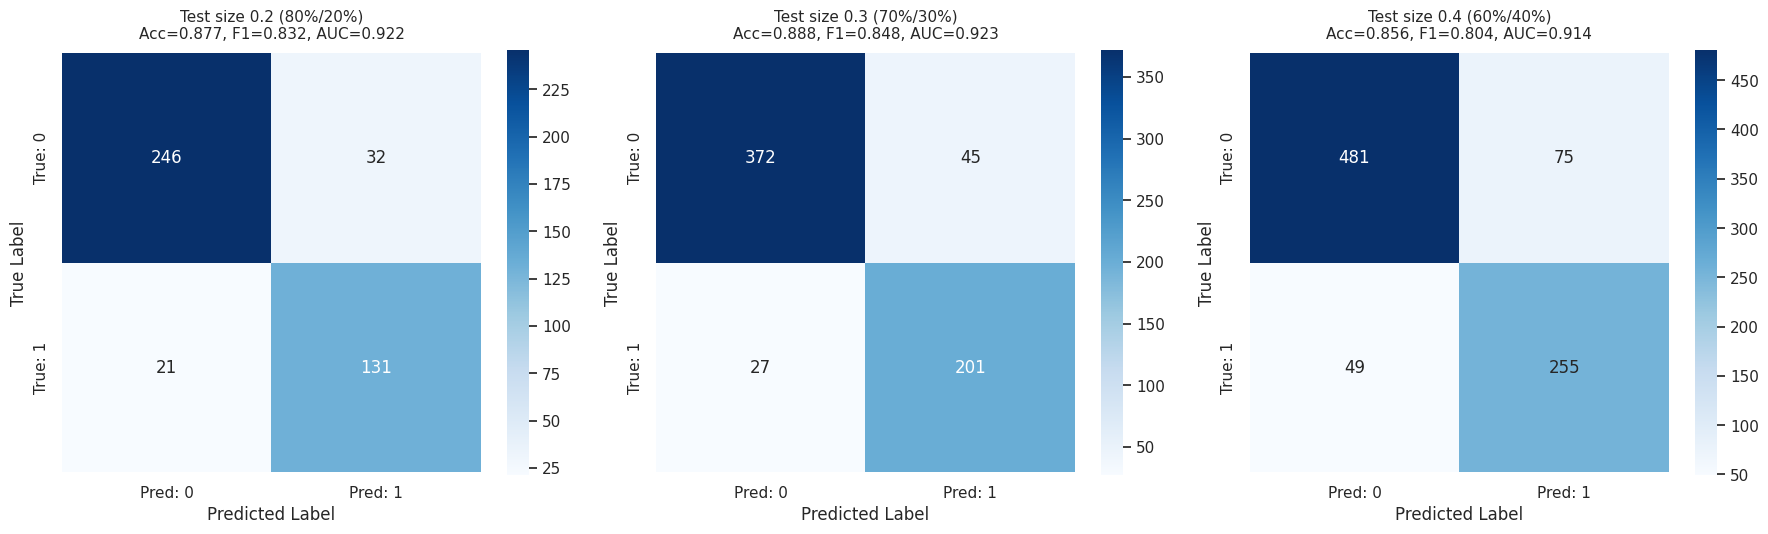

In [ ]:
fig, axes = plt.subplots(1, len(split_ratios), figsize=(len(split_ratios)*6, 5))
if len(split_ratios) == 1:
    axes = [axes]

for idx, test_size in enumerate(split_ratios):
    print(f"\n SPLIT {1-test_size:.0%} TRAIN / {test_size:.0%} TEST ")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    gs = GridSearchCV(
        pipe, param_grid=param_grid,
        scoring='f1', cv=cv,
        n_jobs=-1, verbose=1
    )

    gs.fit(X_train, y_train)

    print("Best params:", gs.best_params_)
    print("Best CV F1:", gs.best_score_)

    best = gs.best_estimator_
    y_pred = best.predict(X_test)
    y_proba = best.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    # In kết quả chi tiết
    print("\n--- TEST PERFORMANCE ---")
    print("Accuracy:", acc)
    print("Recall:", rec)
    print("F1:", f1)
    print("ROC-AUC:", auc)
    print("Classification report:\n", classification_report(y_test, y_pred))
    print("Confusion matrix:\n", cm)

    results.append({
        'Split Ratio': f"{1-test_size:.0%}/{test_size:.0%}",
        'Best Params': gs.best_params_,
        'Accuracy': acc,
        'Recall': rec,
        'F1': f1,
        'ROC-AUC': auc
    })

    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                cbar=True, square=True, ax=ax,
                xticklabels=['Pred: 0', 'Pred: 1'],
                yticklabels=['True: 0', 'True: 1'])
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_title(f'Test size {test_size} ({1-test_size:.0%}/{test_size:.0%})\n'
                 f'Acc={acc:.3f}, F1={f1:.3f}, AUC={auc:.3f}',
                 fontsize=11, pad=10)

plt.tight_layout()
plt.savefig('confusion_matrices_knn.png', dpi=300, bbox_inches='tight')
plt.show()

##Thử nghiệm trên dữ liệu sau giảm chiều bằng PCA


--- Training and test size: 0.2 (80%/20%)
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 9, 'knn__p': 2, 'knn__weights': 'uniform'}
Best mean F1 (CV): 0.6382280441684711
Test Accuracy: 0.6907
Test ROC-AUC: 0.7569
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.67      0.74       278
           1       0.55      0.73      0.63       152

    accuracy                           0.69       430
   macro avg       0.68      0.70      0.68       430
weighted avg       0.72      0.69      0.70       430

Confusion Matrix:
 [[186  92]
 [ 41 111]]

--- Training and test size: 0.3 (70%/30%)
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 13, 'knn__p': 1, 'knn__weights': 'uniform'}
Best mean F1 (CV): 0.6485856195074667
Test Accuracy: 0.6992
Test ROC-AUC: 0.7994
Classification Report:
     

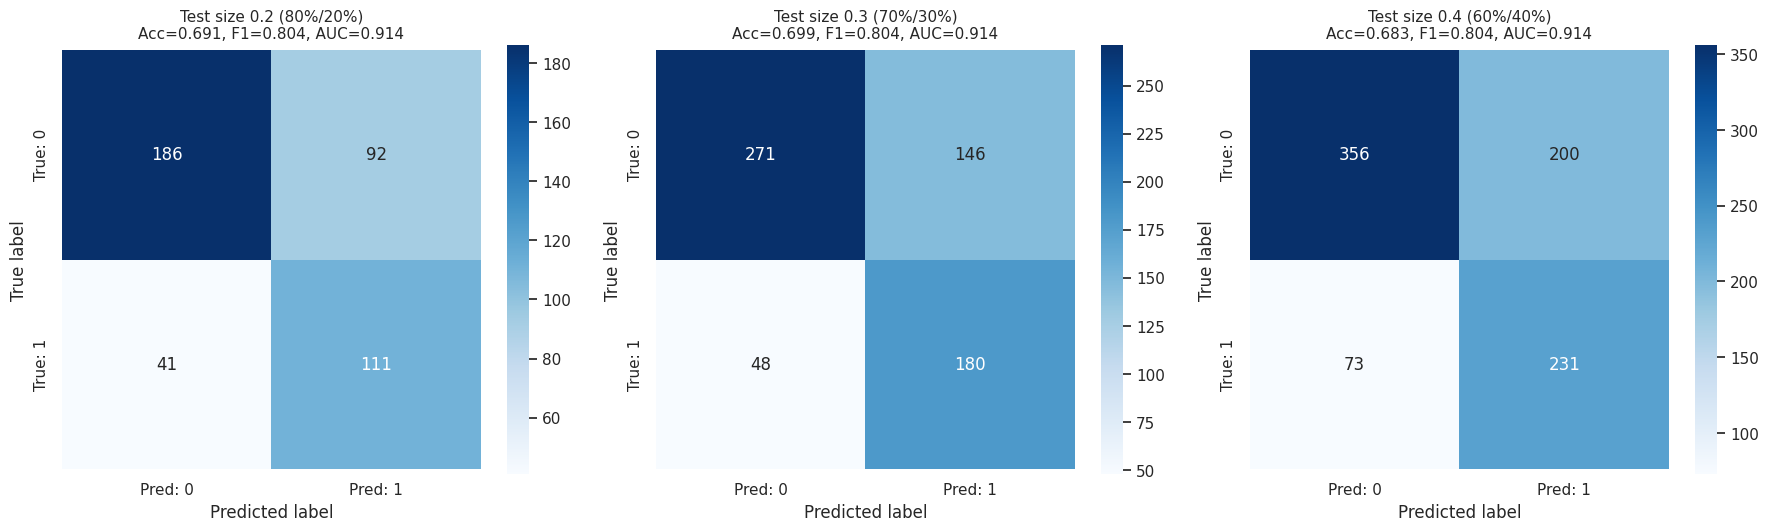

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

TARGET = 'Diagnosis'

# Chuẩn hóa dữ liệu trước khi PCA (nên làm)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca_reduced.drop(columns=[TARGET]))
y = df_pca_reduced[TARGET]

# Thực hiện PCA trên toàn bộ dữ liệu TRƯỚC KHI CHIA
pca_global = PCA(n_components=16)
X_pca_all = pca_global.fit_transform(X_scaled)

# Chia dữ liệu sau khi PCA
split_ratios = [0.2, 0.3, 0.4]
results = []
fig, axes = plt.subplots(1, len(split_ratios), figsize=(len(split_ratios)*6, 5))
if len(split_ratios) == 1:
    axes = [axes]
for idx, test_size in enumerate(split_ratios):
    print(f"\n--- Training and test size: {test_size} ({1-test_size:.0%}/{test_size:.0%})")

    X_train, X_test, y_train, y_test = train_test_split(
        X_pca_all, y, stratify=y, test_size=test_size, random_state=42
    )

    pipe = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('sel', SelectKBest(score_func=f_classif, k=10)),
        ('knn', KNeighborsClassifier())
    ])

    param_grid = {
        'knn__n_neighbors': [3,5,7,9,11,13,15],
        'knn__weights': ['uniform', 'distance'],
        'knn__p': [1,2],
        'knn__algorithm': ['auto','ball_tree','kd_tree']
    }

    cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    gs = GridSearchCV(
        pipe, param_grid=param_grid,
        scoring='f1', cv=cv_strategy, n_jobs=-1, verbose=1
    )

    # Train + đánh giá
    gs.fit(X_train, y_train)

    print("Best params:", gs.best_params_)
    print("Best mean F1 (CV):", gs.best_score_)

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Test Accuracy: {acc:.4f}")
    print(f"Test ROC-AUC: {roc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", cm)
    results.append({
        'Split Ratio': f"{1-test_size:.0%}/{test_size:.0%}",
        'Best Params': gs.best_params_,
        'Accuracy': acc,
        'ROC-AUC': roc
    })
    ax = axes[idx]
    # Ensure we plot the cm we just computed
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, square=True,
                xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'], ax=ax)
    ax.set_xlabel('Predicted label', fontsize=12)
    ax.set_ylabel('True label', fontsize=12)
    ax.set_title(f'Test size {test_size} ({1-test_size:.0%}/{test_size:.0%})\n'
                 f'Acc={acc:.3f}, F1={f1:.3f}, AUC={auc if not np.isnan(auc) else 0:.3f}',
                 fontsize=11, pad=8)

plt.tight_layout()
plt.savefig('confusion_matrices_pca_knn.png', dpi=300, bbox_inches='tight')
plt.show()

##Thử nghiệm trên dữ liệu sau giảm chiều bằng LDA

In [ ]:
# Required libs
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.base import clone
import matplotlib.pyplot as plt
import seaborn as sns
TARGET = 'Diagnosis'

X_lda_reduced = lda_df.drop(columns=[TARGET])
y_lda_reduced = lda_df[TARGET]
lda_cols = [col for col in X_lda_reduced.columns if col.startswith('LD')]
#  Define train/test split ratios
split_ratios = [0.2, 0.3, 0.4]
results = []


 SPLIT 80% TRAIN / 20% TEST 
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params (CV): {'knn__n_neighbors': 11, 'knn__weights': 'uniform'}
Best CV score (scoring='f1'): 0.7543782302737959

--- TEST PERFORMANCE ---
Accuracy: 0.8209
Recall:   0.7500
F1:       0.7475
ROC-AUC:  0.8773546951912155
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       278
           1       0.75      0.75      0.75       152

    accuracy                           0.82       430
   macro avg       0.80      0.80      0.80       430
weighted avg       0.82      0.82      0.82       430

Confusion matrix:
 [[239  39]
 [ 38 114]]

 SPLIT 70% TRAIN / 30% TEST 
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params (CV): {'knn__n_neighbors': 15, 'knn__weights': 'uniform'}
Best CV score (scoring='f1'): 0.7538229954035456

--- TEST PERFORMANCE ---
Accuracy: 0.8171
Recall:   0.7149
F1:       0.7342
ROC-

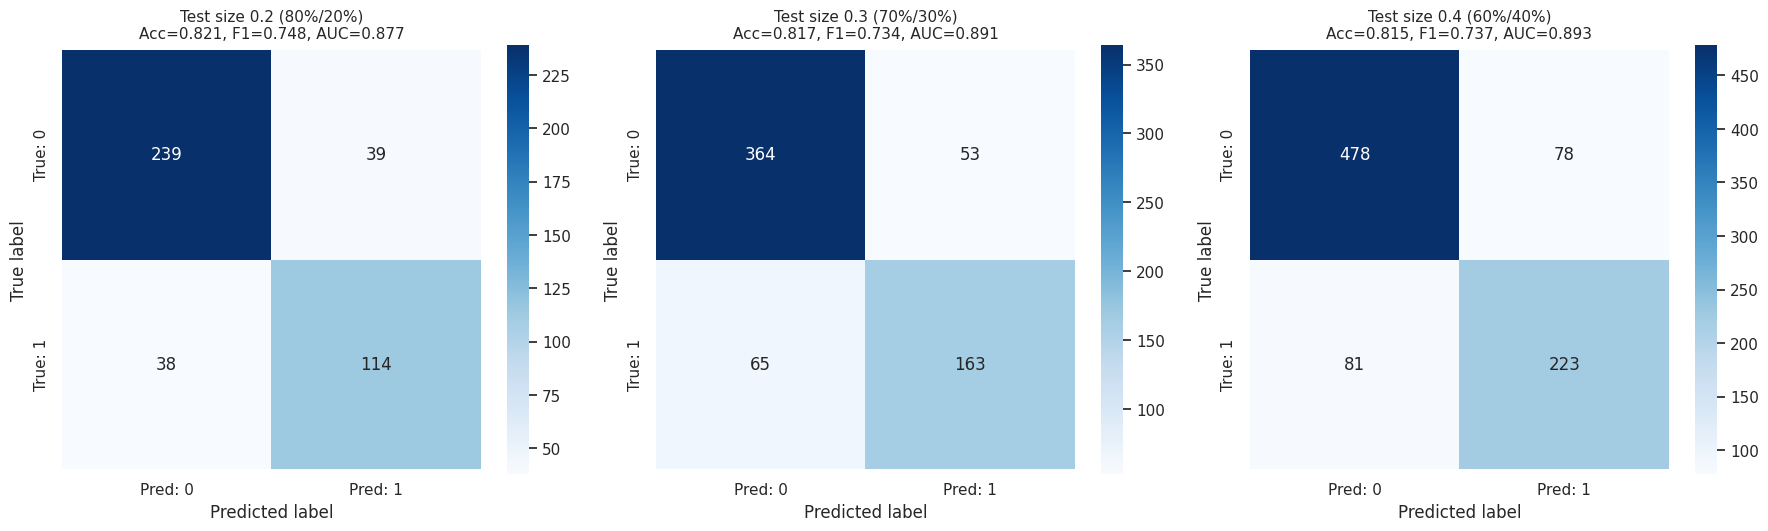

In [ ]:
fig, axes = plt.subplots(1, len(split_ratios), figsize=(len(split_ratios)*6, 5))
if len(split_ratios) == 1:
    axes = [axes]

# Grid search param grid for KNN
param_grid_lda = {
    'knn__n_neighbors': [3,5,7,11,13,15],
    'knn__weights': ['uniform', 'distance']
}
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for idx, test_size in enumerate(split_ratios):
    print(f"\n SPLIT {1-test_size:.0%} TRAIN / {test_size:.0%} TEST ")

    X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(
        X_lda_reduced, y_lda_reduced, stratify=y_lda_reduced, test_size=test_size, random_state=42
    )

    pipe_lda = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])

    gs_lda = GridSearchCV(pipe_lda, param_grid_lda, cv=cv_strategy, scoring='f1', n_jobs=-1, verbose=1)
    gs_lda.fit(X_train_lda, y_train_lda)

    print("Best params (CV):", gs_lda.best_params_)
    print("Best CV score (scoring='f1'):", gs_lda.best_score_)

    best_lda = gs_lda.best_estimator_

    y_pred_lda = best_lda.predict(X_test_lda)
    # predict_proba exists for KNN; handle binary class mapping just in case
    if hasattr(best_lda, "predict_proba"):
        y_pred_proba_lda = best_lda.predict_proba(X_test_lda)[:, 1]
    else:
        # fallback: use decision_function or zeros
        try:
            y_pred_proba_lda = best_lda.decision_function(X_test_lda)
        except Exception:
            y_pred_proba_lda = np.zeros(len(y_test_lda))

    acc = accuracy_score(y_test_lda, y_pred_lda)
    rec = recall_score(y_test_lda, y_pred_lda, zero_division=0)
    f1 = f1_score(y_test_lda, y_pred_lda, zero_division=0)
    # Only compute ROC-AUC if we have 2 classes and probabilities
    try:
        auc = roc_auc_score(y_test_lda, y_pred_proba_lda)
    except Exception:
        auc = np.nan

    cm = confusion_matrix(y_test_lda, y_pred_lda)

    print("\n--- TEST PERFORMANCE ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Recall:   {rec:.4f}")
    print(f"F1:       {f1:.4f}")
    print(f"ROC-AUC:  {auc if not np.isnan(auc) else 'N/A'}")
    print("Classification Report:\n", classification_report(y_test_lda, y_pred_lda, zero_division=0))
    print("Confusion matrix:\n", cm)

    results.append({
        'Split Ratio': f"{1-test_size:.0%}/{test_size:.0%}",
        'Best Params': gs_lda.best_params_,
        'Accuracy': acc,
        'Recall': rec,
        'F1': f1,
        'ROC-AUC': auc
    })

    ax = axes[idx]
    # Ensure we plot the cm we just computed
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, square=True,
                xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'], ax=ax)
    ax.set_xlabel('Predicted label', fontsize=12)
    ax.set_ylabel('True label', fontsize=12)
    ax.set_title(f'Test size {test_size} ({1-test_size:.0%}/{test_size:.0%})\n'
                 f'Acc={acc:.3f}, F1={f1:.3f}, AUC={auc if not np.isnan(auc) else 0:.3f}',
                 fontsize=11, pad=8)

plt.tight_layout()
plt.savefig('confusion_matrices_lda_knn.png', dpi=300, bbox_inches='tight')
plt.show()

#Mô hình Sofmax

##Thử nghiệm trên dữ liệu gốc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/ML/Demo/alzheimers_data.csv")

X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

continuous_cols = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
                   'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
                   'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
binary_cols     = ['Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
                   'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems',
                   'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']
ordinal_cols    = ['EducationLevel']
nominal_cols    = ['Ethnicity']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

bin_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

ord_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'))
])


preprocessor = ColumnTransformer([
    ('num', num_transformer, continuous_cols),
    ('bin', bin_transformer, binary_cols),
    ('ord', ord_transformer, ordinal_cols),
    ('cat', cat_transformer, nominal_cols)
], remainder='drop')


pipe_softmax = Pipeline([
    ('preproc', preprocessor),
    ('sel', SelectKBest(score_func=f_classif)),
    ('softmax', LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=20000,
        random_state=42
    ))
])



 SPLIT 80% TRAIN / 20% TEST 
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best params: {'sel__k': 10, 'softmax__C': 10, 'softmax__penalty': 'l2'}
Best CV F1: 0.8315842157538075

--- TEST PERFORMANCE ---
Accuracy: 0.8302325581395349
Recall: 0.815032184778493
F1: 0.8145621030866932
ROC-AUC: nan
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       278
           1       0.76      0.76      0.76       152

    accuracy                           0.83       430
   macro avg       0.81      0.82      0.81       430
weighted avg       0.83      0.83      0.83       430

Confusion matrix:
 [[241  37]
 [ 36 116]]

 SPLIT 70% TRAIN / 30% TEST 
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best params: {'sel__k': 15, 'softmax__C': 1, 'softmax__penalty': 'l2'}
Best CV F1: 0.8243255037295614

--- TEST PERFORMANCE ---
Accuracy: 0.8418604651162791
Recall: 0.8250189322226429
F1: 0.8263089530487

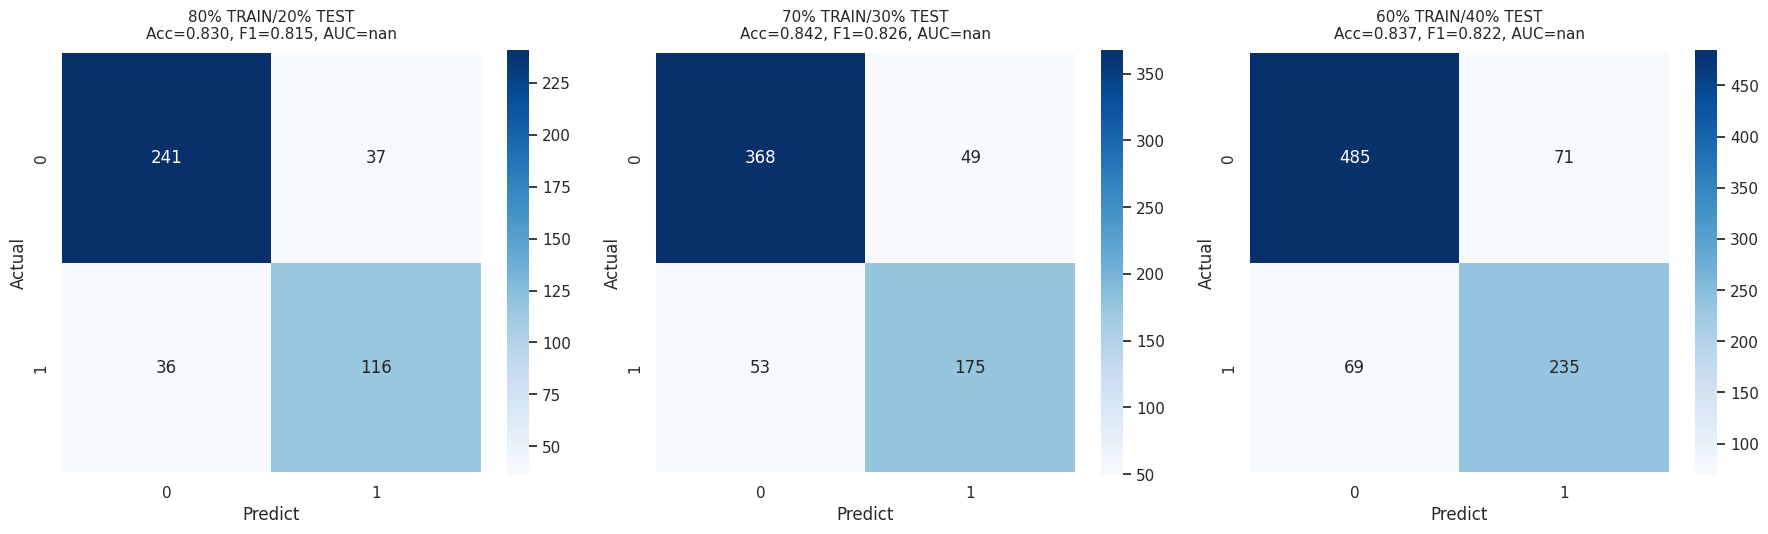

In [ ]:
param_grid_softmax = {
    'sel__k': [10, 15, 20, 30, 'all'],
    'softmax__C': [0.01, 0.1, 1, 10, 100],
    'softmax__penalty': ['l2']
}
# tim ra to hop tham so toi uu
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# chia ti le
split_ratios = [0.2, 0.3, 0.4]

results = []
fig, axes = plt.subplots(1, len(split_ratios), figsize=(len(split_ratios)*6, 5))
if len(split_ratios) == 1:
    axes = [axes]

for idx, test_size in enumerate(split_ratios):
    print(f"\n SPLIT {1-test_size:.0%} TRAIN / {test_size:.0%} TEST ")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    gs = GridSearchCV(
        pipe_softmax,
        param_grid=param_grid_softmax,
        scoring='f1_macro',
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    gs.fit(X_train, y_train)

    print("Best params:", gs.best_params_)
    print("Best CV F1:", gs.best_score_)

    # Mo hinh tot nhats
    best = gs.best_estimator_
    y_pred = best.predict(X_test)

    try:
        y_proba = best.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    except:
        auc = np.nan

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    print("\n--- TEST PERFORMANCE ---")
    print("Accuracy:", acc)
    print("Recall:", rec)
    print("F1:", f1)
    print("ROC-AUC:", auc)
    print("Classification report:\n", classification_report(y_test, y_pred))
    print("Confusion matrix:\n", cm)

    results.append({
        'Split Ratio': f"{1-test_size:.0%}/{test_size:.0%}",
        'Best Params': gs.best_params_,
        'Accuracy': acc,
        'Recall': rec,
        'F1': f1,
        'ROC-AUC': auc
    })

    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                cbar=True, square=True, ax=ax)
    ax.set_xlabel('Predict', fontsize=12)
    ax.set_ylabel('Actual', fontsize=12)
    ax.set_title(f'{1-test_size:.0%} TRAIN/{test_size:.0%} TEST\n'
                 f'Acc={acc:.3f}, F1={f1:.3f}, AUC={auc:.3f}',
                 fontsize=11, pad=10)

plt.tight_layout()
plt.savefig('confusion_matrices_softmax.png', dpi=300, bbox_inches='tight')
plt.show()

##Thử nghiệm trên dữ liệu sau giảm chiều bằng PCA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression

from google.colab import drive
drive.mount('/content/drive')
df_pca = pd.read_csv("/content/drive/My Drive/ML/Demo/df_pca_reduced.csv")

X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

pipe_softmax = Pipeline([
    ('sel', SelectKBest(score_func=f_classif)),
    ('softmax', LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=20000,
        random_state=42
    ))
])


 SPLIT 80% TRAIN / 20% TEST 
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best params: {'sel__k': 10, 'softmax__C': 1, 'softmax__penalty': 'l2'}
Best CV F1: 0.8302889862647455

--- TEST PERFORMANCE ---
Accuracy: 0.8209302325581396
Recall: 0.8018742900416509
F1: 0.8032200357781754
ROC-AUC: nan
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       278
           1       0.75      0.74      0.74       152

    accuracy                           0.82       430
   macro avg       0.80      0.80      0.80       430
weighted avg       0.82      0.82      0.82       430

Confusion matrix:
 [[241  37]
 [ 40 112]]

 SPLIT 70% TRAIN / 30% TEST 
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best params: {'sel__k': 15, 'softmax__C': 1, 'softmax__penalty': 'l2'}
Best CV F1: 0.8194042233483282

--- TEST PERFORMANCE ---
Accuracy: 0.8387596899224806
Recall: 0.8206329673103623
F1: 0.8225396825396

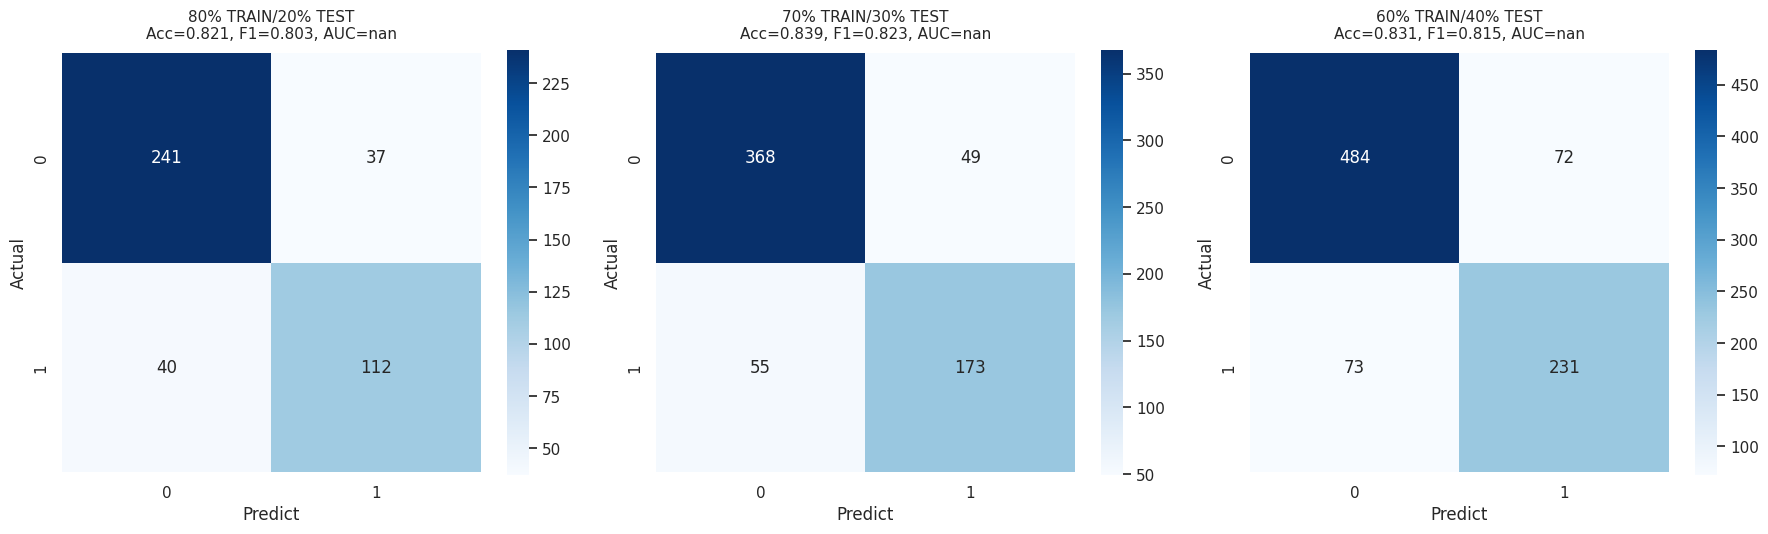

In [ ]:
param_grid_softmax = {
    'sel__k': [10, 15, 20, 30, 'all'],
    'softmax__C': [0.01, 0.1, 1, 10, 100],
    'softmax__penalty': ['l2']
}
# chia ti le
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
split_ratios = [0.2, 0.3, 0.4]

results = []
fig, axes = plt.subplots(1, len(split_ratios), figsize=(len(split_ratios)*6, 5))
if len(split_ratios) == 1:
    axes = [axes]

for idx, test_size in enumerate(split_ratios):
    print(f"\n SPLIT {1-test_size:.0%} TRAIN / {test_size:.0%} TEST ")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    gs = GridSearchCV(
        pipe_softmax,
        param_grid=param_grid_softmax,
        scoring='f1_macro',
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    gs.fit(X_train, y_train)

    print("Best params:", gs.best_params_)
    print("Best CV F1:", gs.best_score_)

    # Mo hinh tot nhats
    best = gs.best_estimator_
    y_pred = best.predict(X_test)

    try:
        y_proba = best.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    except:
        auc = np.nan

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    print("\n--- TEST PERFORMANCE ---")
    print("Accuracy:", acc)
    print("Recall:", rec)
    print("F1:", f1)
    print("ROC-AUC:", auc)
    print("Classification report:\n", classification_report(y_test, y_pred))
    print("Confusion matrix:\n", cm)

    results.append({
        'Split Ratio': f"{1-test_size:.0%}/{test_size:.0%}",
        'Best Params': gs.best_params_,
        'Accuracy': acc,
        'Recall': rec,
        'F1': f1,
        'ROC-AUC': auc
    })

    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                cbar=True, square=True, ax=ax)
    ax.set_xlabel('Predict', fontsize=12)
    ax.set_ylabel('Actual', fontsize=12)
    ax.set_title(f'{1-test_size:.0%} TRAIN/{test_size:.0%} TEST\n'
                 f'Acc={acc:.3f}, F1={f1:.3f}, AUC={auc:.3f}',
                 fontsize=11, pad=10)

plt.tight_layout()
plt.savefig('confusion_matrices_softmax.png', dpi=300, bbox_inches='tight')
plt.show()

##Thử nghiệm trên dữ liệu sau giảm chiều bằng LDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression

from google.colab import drive
df = pd.read_csv("/content/drive/My Drive/ML/Demo/lda_df.csv")

X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

pipe_softmax = Pipeline([
    ('sel', SelectKBest(score_func=f_classif)),
    ('softmax', LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=20000,
        random_state=42
    ))
])


 SPLIT 80% TRAIN / 20% TEST 
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best params: {'sel__k': 10, 'softmax__C': 1, 'softmax__penalty': 'l2'}
Best CV F1: 0.8277624887437888

--- TEST PERFORMANCE ---
Accuracy: 0.8255813953488372
Recall: 0.8099441499432033
F1: 0.8094816127603013
ROC-AUC: nan
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       278
           1       0.75      0.76      0.75       152

    accuracy                           0.83       430
   macro avg       0.81      0.81      0.81       430
weighted avg       0.83      0.83      0.83       430

Confusion matrix:
 [[240  38]
 [ 37 115]]

 SPLIT 70% TRAIN / 30% TEST 
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best params: {'sel__k': 10, 'softmax__C': 0.1, 'softmax__penalty': 'l2'}
Best CV F1: 0.8255768728846858

--- TEST PERFORMANCE ---
Accuracy: 0.8418604651162791
Recall: 0.8230310488451344
F1: 0.82559064302

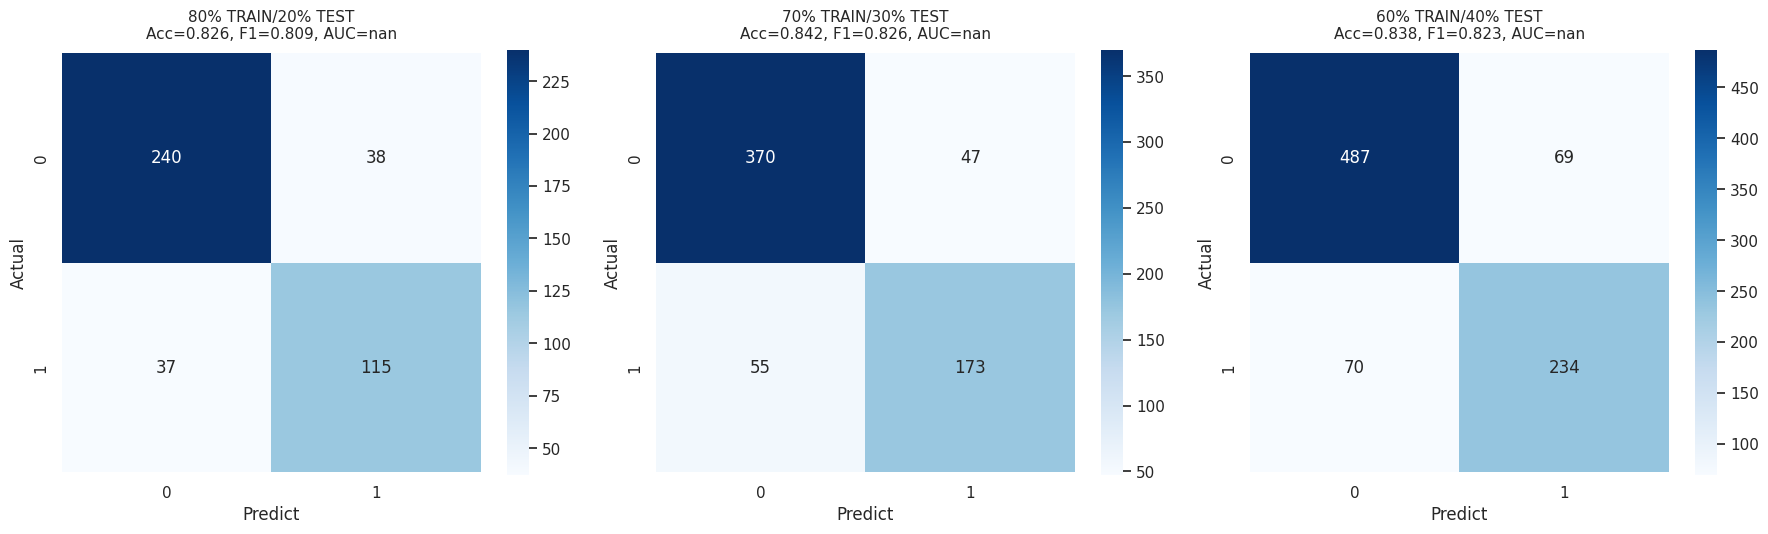

In [ ]:
param_grid_softmax = {
    'sel__k': [10, 15, 20, 30, 'all'],
    'softmax__C': [0.01, 0.1, 1, 10, 100],
    'softmax__penalty': ['l2']
}
# chia ti le
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
split_ratios = [0.2, 0.3, 0.4]

results = []
fig, axes = plt.subplots(1, len(split_ratios), figsize=(len(split_ratios)*6, 5))
if len(split_ratios) == 1:
    axes = [axes]

for idx, test_size in enumerate(split_ratios):
    print(f"\n SPLIT {1-test_size:.0%} TRAIN / {test_size:.0%} TEST ")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    gs = GridSearchCV(
        pipe_softmax,
        param_grid=param_grid_softmax,
        scoring='f1_macro',
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    gs.fit(X_train, y_train)

    print("Best params:", gs.best_params_)
    print("Best CV F1:", gs.best_score_)

    # Mo hinh tot nhats
    best = gs.best_estimator_
    y_pred = best.predict(X_test)

    try:
        y_proba = best.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    except:
        auc = np.nan

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    print("\n--- TEST PERFORMANCE ---")
    print("Accuracy:", acc)
    print("Recall:", rec)
    print("F1:", f1)
    print("ROC-AUC:", auc)
    print("Classification report:\n", classification_report(y_test, y_pred))
    print("Confusion matrix:\n", cm)

    results.append({
        'Split Ratio': f"{1-test_size:.0%}/{test_size:.0%}",
        'Best Params': gs.best_params_,
        'Accuracy': acc,
        'Recall': rec,
        'F1': f1,
        'ROC-AUC': auc
    })

    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                cbar=True, square=True, ax=ax)
    ax.set_xlabel('Predict', fontsize=12)
    ax.set_ylabel('Actual', fontsize=12)
    ax.set_title(f'{1-test_size:.0%} TRAIN/{test_size:.0%} TEST\n'
                 f'Acc={acc:.3f}, F1={f1:.3f}, AUC={auc:.3f}',
                 fontsize=11, pad=10)

plt.tight_layout()
plt.savefig('confusion_matrices_softmax.png', dpi=300, bbox_inches='tight')
plt.show()